# Árboles

Boletín 3: árboles
Para la realización de las prácticas de esta segunda parte de la materia se utilizará scikit-learn, una
librería de aprendizaje estadístico en Python, a través de Jupyter Notebooks. La ejecución se realizará
en el CESGA siguiendo los pasos indicados en el archivo CESGA.pdf.


### Instrucciones para la experimentación en TODOS los boletines de prácticas

En los diferentes ejercicios que se realizarán durante el curso, existen una serie de operaciones con una componente aleatoria: la división en entrenamiento y test, el aprendizaje de un modelo o incluso, en
algunos casos, el test del modelo. Como norma general de experimentación es interesante asegurar la repetibilidad de los experimentos, eliminando la aleatoriedad, puesto que nos permite depurar errores,
comparar modelos, etc. Además, para la evaluación de los boletines también es imprescindible eliminar esa aleatoriedad.

Para ello vamos a fijar la semilla del generador de números aleatorios, de tal manera que su secuencia sea siempre la misma. La semilla se establece mediante el comando np.random.seed(SEED_VALUE), y
en este boletín utilizaremos un SEED_VALUE=1. Será necesario utilizar este comando inmediatamente antes de cualquier operación con un componente aleatorio. Esto incluye: train_test_split(), fit(),
predict(), etc. En aquellas funciones que lo admitan, sustituiremos el comando np.random.seed(SEED_VALUE) por el argumento random_state=SEED_VALUE.

In [13]:
!python --version

Python 2.7.15 :: Anaconda, Inc.


In [14]:
!python3 --version

/usr/bin/sh: python3: command not found


## Importamos las librerías a utilizar

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
#from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
import pickle
import matplotlib.pyplot as plt
import matplotlib

import os
import itertools

In [16]:
%matplotlib inline
matplotlib.style.use('ggplot')
#np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)  # Para evitar warnings en algunas gráficas
import warnings

# Filtrar y ocultar todos los warnings
warnings.filterwarnings('ignore')

## Definimos variables globales

In [17]:
DATASET_NAME = './data/Exercice.data'
DATASET_DELIMITER = ','
SEED_VALUE = 1  # NO CAMBIES ESTA SEMILLA, así todos tendremos los mismos resultados

# Ejercicio 1

Dado el siguiente conjunto de datos de clasificación con 6 observaciones, 3 variables de entrada y
una variable de salida:



## Leemos el fichero de datos

In [18]:

if os.path.exists(DATASET_NAME):
    dataset = pd.read_csv(DATASET_NAME, 
                          delimiter=DATASET_DELIMITER,
                          skiprows=0,
                          header=None,
                          names = ["X1", "X2", "X3", "Y"])
else:
    dataset = d.DataFrame(np.array(
    [[ 1,  4,  3, -1,  1],
       [ 2, -3, -1, -1,  0],
       [ 3,  3, -2,  0,  0],
       [ 4,  1,  4,  0,  1],
       [ 5, -2,  3,  1,  0],
       [ 6, -3,  5,  5,  0]]), columns=['X1', 'X2', 'X3', 'Y'])
dataset

X1  X2  X3  Y
1   4   3  -1  1
2  -3  -1  -1  0
3   3  -2   0  0
4   1   4   0  1
5  -2   3   1  0
6  -3   5   5  0

El fichero contiene 3 variables y 17 observaciones distintas. Las variables predictoras son `X0` y `X1`, y la variable dependiente sería `Y`. Estamos ante un problema de clasificación binario (dada la naturaleza booleana de `Y`, existen 2 clases).

## Visualizamos los datos

In [19]:

columns = dataset.columns[:-1]  # Exclude the 'Y' column

# Create a 2x3 subplot grid for both histogram and scatter plots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Visualize histograms for the first three columns
for i, column in enumerate(columns[:3]):
    axs[0, i].hist([dataset[dataset['Y'] == 1][column], dataset[dataset['Y'] == 0][column]], label=['1', '0'], bins=20, alpha=0.7)
    axs[0, i].set_title("Histogram of {}".format(column))
    axs[0, i].legend(loc='upper right')

# Create combinations of variables for scatter plot comparison
combinations = list(itertools.combinations(columns, 2))

# Visualize scatter plots for the remaining combinations
for j, (var1, var2) in enumerate(combinations):
    k = j + 1  # Start from the second row
    scatter1 = axs[1, j].scatter(dataset[dataset['Y'] == 1][var1], dataset[dataset['Y'] == 1][var2], c='red', label='1')
    scatter0 = axs[1, j].scatter(dataset[dataset['Y'] == 0][var1], dataset[dataset['Y'] == 0][var2], c='blue', label='0')
    axs[1, j].set_title("{} vs {}".format(var1, var2))
    axs[1, j].set_xlabel(var1)
    axs[1, j].set_ylabel(var2)
    axs[1, j].legend(handles=[scatter1, scatter0], loc='upper right')

# Adjust layout
plt.tight_layout()
plt.show()

Suponiendo que se quiere hacer la predicción de la variable de salida para X1=0, X2=0, X3=0
mediante KNN.

In [20]:
# definimos nuestro punto para la prediccion
point=np.array([0,0,0])

Construye el árbol de clasificación (sin podar) mediante CART y utilizando como criterio la entropía.
La condición de parada debe ser que los nodos hoja sean puros (todos los ejemplos son de la misma
clase). 

En cada nodo del árbol se debe indicar:
- La variable y su valor umbral.
- La entropía correspondiente.
- En los nodos hoja, la clase del nodo y los ejemplos que pertenecen al mismo.

**Nota:** este ejercicio debe hacerse sin utilizar ninguna función de scikit-learn.

ecuación de entropia:

$$ H(X) = -\sum_{i=1}^{n} P(x_i) \log_2 P(x_i) $$

- H(X) representa la entropía del nodo.

- P(xi​) es la probabilidad de cada clase ii, y la sumatoria se realiza sobre todas las clases nn en el conjunto de datos.

Para saber cual es la mejor división se usa esta ecuación

$$ H(X) = entropia_{right} \times numitems_{right} + numitems_{left} \times entropia_{left} $$

- H(X) representa la entropía del de la división- H(X) representa la entropía del árbol.

In [21]:
from collections import Counter
import math
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import Counter


class Nodo:
    def __init__(self,values,father=None,index=0,show=False):
        """
        values: value of variable ( array )
        labels: lables class in order ( array )
        self itemem
        """
        
        self.values=values
        self.labels=values[-1]
        self.show=show
        if self.show:
            print('valores_iniciales',self.values)
        self.cant_values=len(self.labels)
        self.class_names=np.unique(self.labels)
        self.values_per_variable=[]
        self.entropia=self.get_entropia()
        self.index=index
        self.depth= 0 if father is None else father.depth + 1
        self.father=father 
        self.left=None
        self.rigth=None
        self.umbral=None
        self.id = 'Node {}-{}'.format(self.depth, self.index)
        self.variante=0
        
    def procesar_entradas(self,indice=0):
        
   
        xi=self.values[indice].T
        
        subsets_xi = [self.values.T[xi == value] for value in np.unique(xi)]
        #print(xi)
        xi=[i.T[indice] for i in subsets_xi]
        self.values_per_variable.append(np.array([item for array in subsets_xi for item in array.tolist()]))
        xi=[item for array in xi for item in array.tolist()]
        #print("a",xi,subsets_xi)
        #print("a", self.values_per_variable)
        #self.values_per_variable.append(xi)
        y1=[i.T[-1] for i in subsets_xi]
        y1=[item for array in y1 for item in array.tolist()]
        #print("label_nodo",y1,subsets_xi)
        return y1
    
    def get_entropia(self):
        entropia_min=[]
        
        for i,_ in enumerate(self.values[:-1]):
            labels_sorted=self.procesar_entradas(i)
            #print(labels_sorted)
            entropia=-np.sum(np.array(list(map(lambda class_name: 
                                               self.entropia_val(class_name,labels_sorted), self.class_names))))
            #print(entropia)
            entropia_min.append(entropia)
              
        return np.array(entropia_min)
    
    def entropia_val(self,class_name,labels_sorted):
        #print('label',labels_sorted)
        p=len(np.where(labels_sorted == class_name)[0])/ self.cant_values
        return p * math.log(p, 2) if p > 0 else 0  # Evita el logaritmo de cero
    
    def get_umbral(self,split_entropias,variante):
        
        values=self.values_per_variable[variante].T[variante]
        if self.show:
            print(values)
        return (values[split_entropias-1]+values[split_entropias])/2
    
    def generate_new_nodo_only_one(self,valor):
        
        return np.array([[valor[0]],[valor[1]]])
    
    def get_best_split(self):
        
        entropias_all_split=np.matrix([self.get_entropia_split(i+1) for i in range(self.cant_values-1)])
        split_entropias=np.argmin(entropias_all_split)
        split_entropias,variante=np.unravel_index(split_entropias, entropias_all_split.shape)#np.argmin(entropias_all_split)
        if self.show:
            print(entropias_all_split,split_entropias,variante)
        if self.cant_values-split_entropias>1 and len(entropias_all_split)>1:
           
            split_entropias+=1
            
        #print(entropias_all_split,split_entropias,len(entropias_all_split)>1)
        if len(entropias_all_split)>1:
            if self.show:
                print("nuevo_nodo",self.values_per_variable[variante][:split_entropias].T)
            self.rigth=Nodo(self.values_per_variable[variante][:split_entropias].T
                            ,self,0,show=False)
            self.left=Nodo(self.values_per_variable[variante][split_entropias:].T
                           ,self,1,show=False)
            self.values=self.values_per_variable[variante].T
            self.labels=self.values[-1]
            self.umbral=self.get_umbral(split_entropias,variante)

        elif self.cant_values>1:
            if self.show:
                print("nuevo_nodo_solo",np.array(self.values_per_variable[variante][0]))
            self.rigth=Nodo(self.generate_new_nodo_only_one(self.values_per_variable[variante][0])
                             ,self,0,show=False)
            self.left=Nodo(self.generate_new_nodo_only_one(self.values_per_variable[variante][1])
                           ,self,1,show=False)
            self.umbral=self.get_umbral(1,variante)
        
        self.variante=variante
        return self.rigth,self.left
    
    def get_entropia_split(self,i):
        entropia=[]
        for variante,_ in enumerate(self.values_per_variable):
            nodo_probe_1=Nodo(self.values_per_variable[variante][:i].T)
            nodo_probe_2=Nodo(self.values_per_variable[variante][i:].T)
            entropia.append(nodo_probe_1.entropia[variante]* self.cant_values +
                            nodo_probe_2.cant_values*nodo_probe_2.entropia[variante])
        return entropia
    
    def get_entropia_value(self):
        if self.show:
            print('self.entropia',self.entropia)
        return np.min(self.entropia)
    
    def __str__(self):
        return "{},{},{}".format(self.id, self.cant_values, self.labels)


    def draw(self, G, pos=None, labels=None, parent_name=None):
        # If this is the first call, create new structures
        if pos is None:
            pos = {}
        if labels is None:
            labels = {}
        if self.show:
            print(self.values)   
            print(self.labels)
            
        # Create a unique identifier for the current node
        
        node_id = 'Node {}-{}'.format(self.depth, self.index)
        label_str = ('umbral para X{}<= {}\nsamples={}\nentropy={:.3f}'
                     '\nvalue={}\nlabel={}\nclass={}').format(
            self.variante + 1, self.umbral, self.cant_values, 
            self.get_entropia_value(), self.values.T, self.labels, 
            Counter(self.labels).most_common(1)[0][0]
        )
        
        labels[node_id] = label_str
        # Determine the position of the current node based on its depth and index
        pos[node_id] = (self.index, -self.depth)
        #print(pos)
        # Add the current node to the graph
        G.add_node(node_id)

        # If this node has a parent, add an edge from the parent to this node
        if parent_name is not None:
            G.add_edge(parent_name, node_id)
        
        # Recursively draw the children
        if self.left is not None:
           
            self.left.draw(G, pos, labels, node_id)
            
        if self.rigth is not None:
            self.rigth.draw(G, pos, labels, node_id)

        return G, pos, labels
    
class Tree_class:
    def __init__(self,values,num_nodos=-1,pure=True):
        self.root=Nodo(values)
        self.next=[self.root]
        cont=0
        while True: 
            element=self.next.pop()
            #print(element)
            if element.get_entropia_value()>0:
                right,left=element.get_best_split()
                #print(right,left)
                if left is not None:
                    self.next.append(right)
                    self.next.append(left)
            #print(self.next)
            cont=+1
            if len(self.next)<=0 or cont==2:
                break
            
    def draw_tree(self):
        G = nx.DiGraph()
        # Start the recursive drawing from the root
        G, pos, labels = self.root.draw(G)
        
        # Draw the graph
        plt.figure(figsize=(12, 8))
        #nx.draw(G, pos, labels=labels, with_labels=True, arrows=False)
        # Draw the nodes
        nx.draw_networkx_nodes(G, pos, node_size=4500, node_color="skyblue")

        # Draw the edges
        nx.draw_networkx_edges(G, pos, arrowstyle="->", arrowsize=20)

        # Draw the labels inside rectangles
        for node, label in labels.items():
            x, y = pos[node]
            plt.text(x, y, label, ha='center', va='center', bbox=dict(facecolor='white', edgecolor='black'))

        # Remove the axis
        plt.axis('off')
        
        plt.show()

        


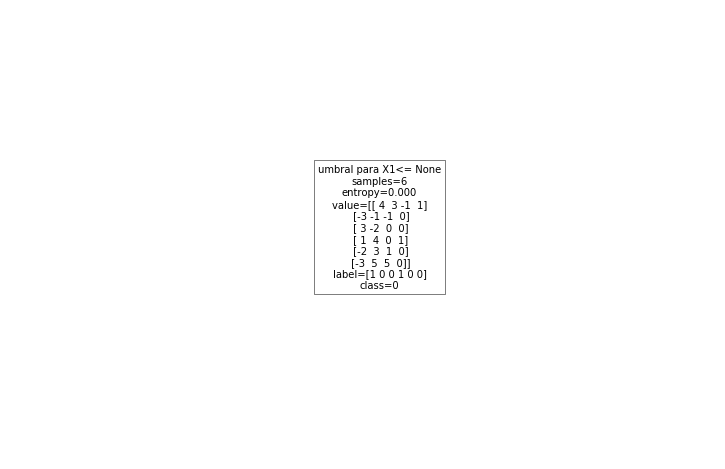

In [22]:
datos=np.array(
    [  [   4,  3, -1,  1],
       [  -3, -1, -1,  0],
       [   3, -2,  0,  0],
       [   1,  4,  0,  1],
       [  -2,  3,  1,  0],
       [  -3,  5,  5,  0]])#dataset.to_numpy()
#print(datos)
x11=datos.T[0]
#print(x11)
x1=datos.T[:]
subsets_x1 = [x1.T[x11 == value] for value in np.unique(x11)]
#print(subsets_x1)
xi=[i.T[0] for i in subsets_x1]
#print(xi)
#print(x1.T[:2].T,x1,x1[2])
arbol=Tree_class(x1)
arbol.draw_tree()


### Comparamos el resultado con scikit-learn

In [23]:
# Separar las características y la variable objetivo
X = dataset[['X1', 'X2', 'X3']]
y = dataset['Y']

clf = DecisionTreeClassifier()
clf.fit(X, y)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [24]:
#plt.figure(figsize=(12, 8))
#plot_tree(clf, filled=True, feature_names=['X1', 'X2', 'X3'], class_names=['0', '1'])
#plt.show()

Como se pude obsevar el resultado es similar por lo que podemos saber que esta haceindo correctamente la división

# Ejercicio 2

Dado el problema de clasificación [Blood Transfusion Service Center](https://archive.ics.uci.edu/dataset/176/blood+transfusion+service+center):


**a)Analiza las características del conjunto de datos: número y tipo de variables de entrada y
salida, número de instancias, número de clases y distribución de las mismas, correlación
entre las variables, valores perdidos, etc.** 

## Leemos el fichero de datos

In [25]:
DATASET_BLOOD='./data/blood+transfusion+service+center/bloodTransfusion.data'
# Leer el archivo de datos y obtener la primera fila como nombres de columnas
data = pd.read_csv(DATASET_BLOOD)
NAME_BLOOD = data.columns.tolist()

NAME_BLOOD=["Reciente","Frecuencia","Cantidad_Sangre","Tiempo","Donacion_marzo"]
if os.path.exists(DATASET_BLOOD):
    dataset = pd.read_csv(DATASET_BLOOD, 
                          delimiter=DATASET_DELIMITER,
                          skiprows=1,
                          header=None,
                          names = NAME_BLOOD)
else:
    dataset = d.DataFrame(np.array(
    [[0, 3, 2, 1], 
    [3, 0, 3, 0], 
    [0, 3, -1, 0], 
    [3, 0, 0, 1], 
    [1, 2, 1, 1], 
    [2, 1, 0, 0]]), columns=['X1', 'X2', 'X3', 'Y'])
    
display(dataset)

Reciente  Frecuencia  Cantidad_Sangre  Tiempo  Donacion_marzo
0           2          50            12500      98               1
1           0          13             3250      28               1
2           1          16             4000      35               1
3           2          20             5000      45               1
4           1          24             6000      77               0
5           4           4             1000       4               0
6           2           7             1750      14               1
7           1          12             3000      35               0
8           2           9             2250      22               1
9           5          46            11500      98               1
10          4          23             5750      58               0
11          0           3              750       4               0
12          2          10             2500      28               1
13          1          13             3250      47               0
14          2           6             1500      15               1
15          2           5             1250      11               1
16          2          14             3500      48               1
17          2          15             3750      49               1
18          2           6             1500      15               1
19          2           3              750       4               1
20          2           3              750       4               1
21          4          11             2750      28               0
22          2           6             1500      16               1
23          2           6             1500      16               1
24          9           9             2250      16               0
25          4          14             3500      40               0
26          4           6             1500      14               0
27          4          12             3000      34               1
28          4           5             1250      11               1
29          4           8             2000      21               0
..        ...         ...              ...     ...             ...
718        21           3              750      35               0
719        23           8             2000      69               0
720        21           3              750      38               0
721        23           3              750      35               0
722        21           3              750      40               0
723        23           2              500      28               0
724        21           1              250      21               0
725        21           1              250      21               0
726        25           6             1500      50               0
727        21           1              250      21               0
728        21           1              250      21               0
729        23           3              750      39               0
730        21           2              500      33               0
731        14           3              750      79               0
732        23           1              250      23               1
733        23           1              250      23               0
734        23           1              250      23               0
735        23           1              250      23               0
736        23           1              250      23               0
737        23           1              250      23               0
738        23           1              250      23               0
739        23           4             1000      52               0
740        23           1              250      23               0
741        23           7             1750      88               0
742        16           3              750      86               0
743        23           2              500      38               0
744        21           2              500      52               0
745        23           3              750      62  

In [26]:
print('Tipo del dato de cada columna:')
print(dataset.dtypes)
# Comprobamos si hay nan
print("\n Cantidad de valores NaN en cada columna:")
dataset.isna().sum()

Tipo del dato de cada columna:
Reciente           int64
Frecuencia         int64
Cantidad_Sangre    int64
Tiempo             int64
Donacion_marzo     int64
dtype: object

 Cantidad de valores NaN en cada columna:


Reciente           0
Frecuencia         0
Cantidad_Sangre    0
Tiempo             0
Donacion_marzo     0
dtype: int64



Cada columna de este DataFrame representa la siguiente información:

- Reciente (Recency (months)): el número de meses que han pasado desde la última donación.
- Frecuencia (Frequency (times)): el número total de donaciones de esta persona.
- Cantidad_Sangre (Monetary (c.c. blood)): cantidad total de sangre donada en centímetros cúbicos (c.c.).
- Tiempo (Time (months)): el número de meses desde la primera donación de esta persona.
- Donacion_marzo (whether he/she donated blood in March 2007): la variable a predecir, que nos indica si esta persona donó o no en Marzo de 2007 (1 significa que donó mientras que 0 indica que no donó).

siendo la cantidad de instancias dentro del dataset de 748


## Visualizamos los datos

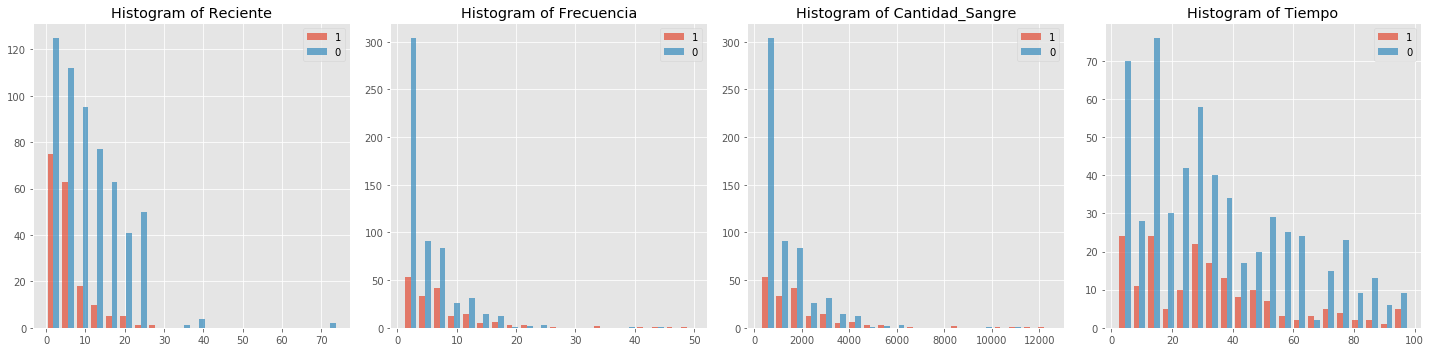

In [27]:
# Excluir la columna de la etiqueta
columns = dataset.columns[:-1]

# Crear una cuadrícula de subtramas 2x4 para histogramas y gráficos de dispersión
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Visualizar histogramas para todas las columnas
for i, column in enumerate(columns):
    axs[i].hist([dataset[dataset['Donacion_marzo'] == 1][column], 
                    dataset[dataset['Donacion_marzo'] == 0][column]], 
                   label=['1', '0'], bins=20, alpha=0.7)
    axs[i].set_title("Histogram of {}".format(column))
    axs[i].legend(loc='upper right')
# Ajustar el diseño
plt.tight_layout()
plt.show()



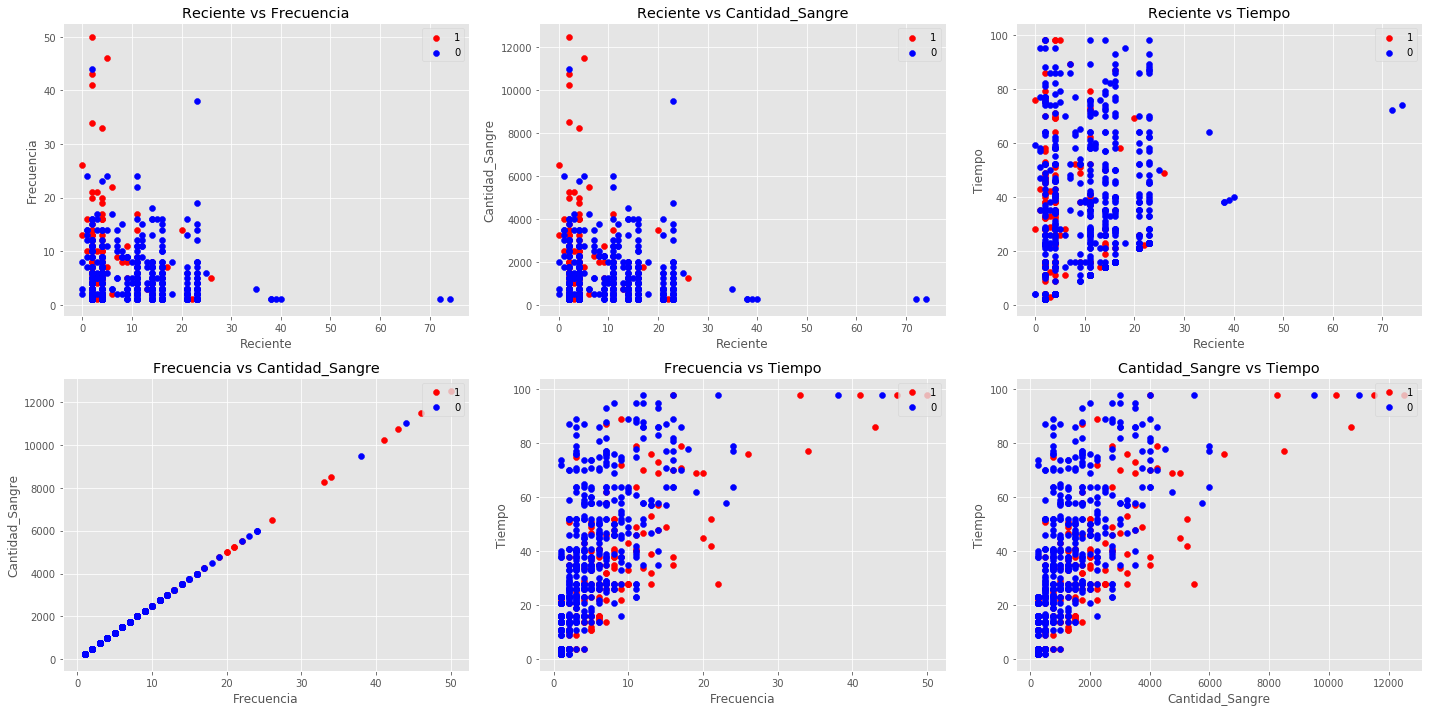

In [28]:
# Crear todas las combinaciones posibles de pares de variables
combinations = list(itertools.combinations(columns, 2))

# Calcular el número de filas necesario para acomodar todas las combinaciones
num_combinations = len(combinations)
num_rows = num_combinations // 3 + (num_combinations % 3 > 0)

# Crear una cuadrícula de subtramas con un número suficiente de filas para todas las combinaciones
fig, axs = plt.subplots(num_rows, 3, figsize=(20, num_rows * 5))  # Ajustar el tamaño de figura según sea necesario

# Visualizar gráficos de dispersión para todas las combinaciones
for j, (var1, var2) in enumerate(combinations):
    row = j // 3
    col = j % 3
    axs[row, col].scatter(dataset[dataset['Donacion_marzo'] == 1][var1], 
                          dataset[dataset['Donacion_marzo'] == 1][var2], 
                          c='red', label='1')
    axs[row, col].scatter(dataset[dataset['Donacion_marzo'] == 0][var1], 
                          dataset[dataset['Donacion_marzo'] == 0][var2], 
                          c='blue', label='0')
    axs[row, col].set_title("{} vs {}".format(var1, var2))
    axs[row, col].set_xlabel(var1)
    axs[row, col].set_ylabel(var2)
    axs[row, col].legend(loc='upper right')

# Ajustar el diseño para que no haya superposición
plt.tight_layout()

# Mostrar la figura
plt.show()

 **Nota**

- **Desequilibrio de Clases**: La primera fila de histogramas muestra un claro desequilibrio de clases entre aquellos que donaron sangre en marzo de 2007 (etiqueta '1') y aquellos que no lo hicieron (etiqueta '0'). Esto puede afectar el rendimiento del modelo de aprendizaje automático, ya que puede sesgarse hacia la clase más frecuente. Se recomienda aplicar técnicas de balanceo de clases como sobremuestreo, submuestreo o generación de datos sintéticos para manejar este desequilibrio.

- **Relación entre 'Frequency' y 'Monetary'**: La correlación directa entre 'Frequency' y 'Monetary' es evidente en el gráfico de dispersión de la esquina inferior derecha, lo que indica una relación lineal casi perfecta. Esto es coherente con la naturaleza de las variables, dado que 'Monetary' es probablemente un múltiplo de 'Frequency' (cada donación tiene un volumen fijo de sangre). Esto sugiere que una de las dos variables podría ser redundante para el modelado predictivo, y se podría considerar eliminar una para simplificar el modelo sin perder información significativa.

- **Posible correlación entre 'Time' y otras variables**: Los gráficos de dispersión 'Reciente vs Tiempo' y 'Frecuencia vs Tiempo' no muestran una relación lineal clara, pero sí sugieren algún tipo de relación. Por ejemplo, en 'Reciente vs Tiempo', hay una tendencia de que aquellos con valores más bajos de 'Reciente' tienen una distribución más amplia en 'Tiempo', lo que podría sugerir que los donantes nuevos tienden a tener un historial más corto de donaciones. Sin embargo, esta observación necesita ser investigada más a fondo, posiblemente con análisis estadísticos para establecer la fuerza y la significancia de la correlación.

- **Dispersión de los datos**: Hay una dispersión considerable en los datos, especialmente en los gráficos de dispersión 'Reciente vs Frecuencia' y 'Reciente vs Cantidad_Sangre', lo que podría indicar que la variable 'Reciente' tiene una relación menos directa con la frecuencia y la cantidad de donaciones en comparación con la relación entre 'Frecuencia' y 'Cantidad_Sangre'.


**PCA:** como observalos la relación entre 'Frequency' y 'Monetary' se podría hacer una reducción dimensional para mejorar el funconamiento de KNN 

**b)** División de los datos en entrenamiento (80%) y test (20%):

<span style="color:red">**MUY IMPORTANTE:**</span> Vamos a establecer una semilla con un valor predefinido inmediatamente antes de ejecutar cualquier operación con un componente aleatorio. Así aseguramos que nuestros resultados sean repetibles.

Esto es, vamos a poner `np.random.seed(SEED_VALUE)` antes de:
 - `fit()`
 - `predict()`
 
En aquellas funciones que lo admitan, sustituiremos el comando np.random.seed(SEED_VALUE) por el argumento `random_state=SEED_VALUE`. Por ejemplo, para la división de datos entre entrenamiento y test con `train_test_split`.

In [29]:
# tenemos mas ejemplos de una categoria que en otra si queremos hacer una experimentación para el conjunto de test 
# con stratify mantenga el mismo poncentaje de cadad clase  en el test y en el train en este 
# caso es para que train si hay 2 categorias mantenga la proporcion de estas en train y test decir que si en el total 
# tenemos 60% 1 y 40% 2 se intenta man tener el porcentaje de dataos 
dataset_train, dataset_test = train_test_split(dataset,
                            test_size=0.2, random_state=SEED_VALUE,
                                              stratify=dataset["Donacion_marzo"])
print(dataset_test.shape)
display(dataset_test.head())

(150, 5)


Reciente  Frecuencia  Cantidad_Sangre  Tiempo  Donacion_marzo
309        16           3              750      19               0
711        23           6             1500      45               0
343        11           1              250      11               0
462        21           1              250      21               1
646        14           2              500      14               0

## Gestión de valores faltantes

En este caso, nuestro dataset no tiene valores faltantes.
Sin embargo, la sustitución de las variables predictoras por la media se llevaría a cabo de la siguiente manera. 

In [30]:
#imp = SimpleImputer(missing_values=np.nan, fill_value='mean')
#imp = imp.fit(dataset_train)  # La media la calculamos SÓLO a partir del conjunto de train

# Los valores van a ser los mismos que antes, pues no tenemos datos faltantes
#dataset_train_prep = imp.transform(dataset_train)
#dataset_test_prep = imp.transform(dataset_test)

#dataset_test_prep

`SimpleImputer` ha convertido nuestros valores a un array NumPy, por lo que sería bueno que los volviéramos a convertir en formato dataframe.

In [31]:
#dataset_train = pd.DataFrame(dataset_train_prep,
#                             columns=dataset_train.columns,
#                             index=dataset_train.index)
#dataset_test = pd.DataFrame(dataset_test_prep,
#                            columns=dataset_test.columns,
#                            index=dataset_test.index)

#dataset_test

## Separación de variables predictoras y dependientes

In [32]:
dataset_train_X = dataset_train.loc[:, NAME_BLOOD[:-1]].astype(float)
dataset_train_Y = dataset_train.loc[:, NAME_BLOOD[-1]]

print("dimension:",dataset_train_X.shape)
display(dataset_train_X.head())


('dimension:', (598, 4))


Reciente  Frecuencia  Cantidad_Sangre  Tiempo
619       4.0         1.0            250.0     4.0
357      14.0         3.0            750.0    26.0
405      14.0         3.0            750.0    41.0
700      16.0         3.0            750.0    35.0
479      23.0         1.0            250.0    23.0

In [33]:
dataset_test_X = dataset_test.loc[:, NAME_BLOOD[:-1]].astype(float)
dataset_test_Y = dataset_test.loc[:, NAME_BLOOD[-1]]

print("dimension:",dataset_train_X.shape)
display(dataset_test_X.head())

('dimension:', (598, 4))


Reciente  Frecuencia  Cantidad_Sangre  Tiempo
309      16.0         3.0            750.0    19.0
711      23.0         6.0           1500.0    45.0
343      11.0         1.0            250.0    11.0
462      21.0         1.0            250.0    21.0
646      14.0         2.0            500.0    14.0

## Estandarización de los datos

Esto hay que hacerlo **DESPUÉS** de dividir en conjuntos de entrenamiento y test.

Además, como es un problema de clasificación, **NO** estandarizaremos la variable dependiente. 

**IMPORTANTE : EN ESTE CASO NO ES NECESARIO USAR LA ESTANDARIZACIÓN POR COMO SE COMPORTAN LOS ARBOLES DE DECISIÓN PERO NO IMPLICA NINGUNA PERDIDA HACERLO POR LO QUE SE EJECUTARÁ**

In [34]:
scaler = StandardScaler()

scaler.fit(dataset_train_X)

dataset_train_X_scaled = scaler.transform(dataset_train_X)
dataset_test_X_scaled = scaler.transform(dataset_test_X)

#dataset_test_X_scaled

Estos son los valores con los que se ha estandarizado.

In [35]:
print("mean {}: {}  |  std {}: {}".format(NAME_BLOOD[:-1],scaler.mean_, NAME_BLOOD[:-1],scaler.scale_))

mean ['Reciente', 'Frecuencia', 'Cantidad_Sangre', 'Tiempo']: [   9.5083612     5.63712375 1409.28093645   34.87959866]  |  std ['Reciente', 'Frecuencia', 'Cantidad_Sangre', 'Tiempo']: [   7.89304107    5.89317612 1473.29403119   24.72995729]


## Empezamos con la experimentación de clasificación con arboles

Hemos visualizado y preprocesado los datos. Vamos a empezar a trabajar con nuestro predictor.

## Definimos un rango de hiperparámetros para realizar las pruebas

In [36]:

# Expected n_neighbors <= n_samples,  n_samples = 477
# Si solo necesitas el número de muestras
n_samples = dataset_train_X_scaled.shape[0]

# ('Numero de muestras:', 598) auque pone este valor al usar  GridSearchCV me indica que son 477
print("Numero de muestras:", n_samples)

hyperparameters = {
    'min_samples_split': range(2, n_samples, 1),
  
}
# hay


('Numero de muestras:', 598)


## Comenzamos las pruebas con 5-CV

In [37]:
arbol_classifier = DecisionTreeClassifier()
modelCV = GridSearchCV(arbol_classifier,
                       hyperparameters,
                       cv=5,
                       scoring='accuracy', # parametro  top mejores en regresion mean scare error(skle pueda dar - std)
                       return_train_score=True)  # El warning es normal, pues el ejemplo es demasiado pequeño

np.random.seed(SEED_VALUE)  # Por como funciona KNN, no haría falta establecer una semilla. Pero lo ponemos igualmente
modelCV.fit(dataset_train_X_scaled, dataset_train_Y)  # En KNN no hay aprendizaje en sí, pero hay que ejecutar este comando para poder hacer inferencias

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70...578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

Muestra la gráfica del error de entrenamiento con validación cruzada (5-CV) frente al valor
del hiper-parámetro.
**¿Cuál es el menor error de validación cruzada, su desviación estándar
y el valor del hiper-parámetro para el que se consigue? ¿Cuál es el valor del hiper-
parámetro si se aplicase la regla de una desviación estándar? En caso de que haya varios
modelos con error mínimo, debe seleccionarse siempre el más simple (cuantos mas vecinos mas simple por que la frontera de decisión es mas suave).**

## Resultados obtenidos en 5-CV

Puede verse el ranking de los mejores

In [38]:
cv_results = pd.DataFrame(modelCV.cv_results_)

cv_results.loc[:, [ 'param_min_samples_split', 'mean_test_score', 'std_test_score', 'rank_test_score']].head()


param_min_samples_split  mean_test_score  std_test_score  rank_test_score
0                       2         0.712375        0.045362              596
1                       3         0.715719        0.036305              595
2                       4         0.724080        0.038056              593
3                       5         0.729097        0.041098              590
4                       6         0.720736        0.046482              594

Los mejores hiperparámetros en validación serían los siguientes (aunque no siempre conviene quedarse con los mejores):

In [39]:
cv_results_best = cv_results[cv_results['rank_test_score'] == 1]
cv_results_best.loc[:, [ 'param_min_samples_split', 'mean_test_score', 'std_test_score', 'rank_test_score']]

param_min_samples_split  mean_test_score  std_test_score  rank_test_score
81                       83         0.797659        0.015857                1
82                       84         0.797659        0.015857                1
83                       85         0.797659        0.015857                1
84                       86         0.797659        0.015857                1
85                       87         0.797659        0.015857                1
86                       88         0.797659        0.015857                1
87                       89         0.797659        0.015857                1
88                       90         0.797659        0.015857                1
89                       91         0.797659        0.015857                1
90                       92         0.797659        0.015857                1
91                       93         0.797659        0.015857                1
92                       94         0.797659        0.015857                1
93                       95         0.797659        0.015857                1
94                       96         0.797659        0.015857                1
95                       97         0.797659        0.015857                1
96                       98         0.797659        0.015857                1
97                       99         0.797659        0.015857                1
98                      100         0.797659        0.015857                1
99                      101         0.797659        0.015857                1
100                     102         0.797659        0.015857                1
101                     103         0.797659        0.015857                1
102                     104         0.797659        0.015857                1
103                     105         0.797659        0.015857                1
104                     106         0.797659        0.015857                1
105                     107         0.797659        0.015857                1
106                     108         0.797659        0.015857                1
107                     109         0.797659        0.015857                1
108                     110         0.797659        0.015857                1
109                     111         0.797659        0.015857                1
110                     112         0.797659        0.015857                1
111                     113         0.797659        0.015857                1
112                     114         0.797659        0.015857                1
113                     115         0.797659        0.015857                1
114                     116         0.797659        0.015857                1
115                     117         0.797659        0.015857                1
116                     118         0.797659        0.015857                1
117                     119         0.797659        0.015857                1

En el contexto de los árboles de decisión, un modelo más simple suele ser aquel con mayor valor de min_samples_split, ya que esto conduce a un árbol menos profundo y, por lo tanto, a un modelo más general. 

## Gráfica de entrenamiento

In [40]:
# separamos los pesos basados en cada 
cv_results_uniform = cv_results

plt.figure(figsize=(16, 5))  # Puedes cambiar estos valores según tus necesidades
# eje x xantidad de vecinos y en el y cuanto es el errror
plt.title("Error de validacion")
plt.errorbar(cv_results_uniform['param_min_samples_split'],1 - cv_results_uniform['mean_test_score'],
             cv_results_uniform['std_test_score'], label='default', capsize=3)  # 1 - [] para imprimir el error
plt.legend(loc='upper right')
plt.show()

Se observa que apartir de ciento numero de vecinos el error es constante y con la misma variación por lo que haremos un acercamiento a a la parte del grafico que  tiene variación para poder observar mejor esta sección. 

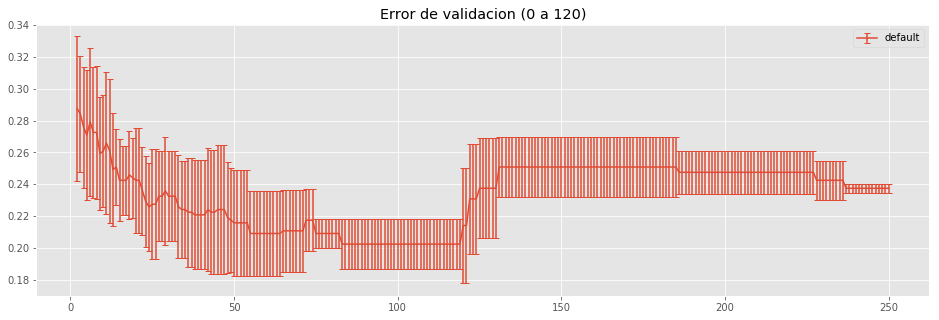

In [41]:
# Primera gráfica: De 0 a 110
plt.figure(figsize=(16, 5))
plt.title("Error de validacion (0 a 120)")
subset = cv_results_uniform[cv_results_uniform['param_min_samples_split'] <= 250]
plt.errorbar(subset['param_min_samples_split'],1 - subset['mean_test_score'],
             subset['std_test_score'], label='default', capsize=3)  # 1 - [] para imprimir el error
plt.legend(loc='upper right')
plt.show()

In [42]:
# Resultados obtenidos en 5-CV
cv_results = pd.DataFrame(modelCV.cv_results_)
# Guardar los resultados completos en un archivo CSV
cv_results.to_csv('cv_results.csv', index=False)

# Filtrar y guardar los mejores resultados
cv_results_best = cv_results[cv_results['rank_test_score'] == 1]
cv_results_best.to_csv('cv_results_best.csv', index=False)

# Separar los resultados por tipo de peso y guardarlos
cv_results_uniform = cv_results
cv_results_uniform.to_csv('cv_results_uniform.csv', index=False)


In [43]:
cv_results_best = cv_results[cv_results['rank_test_score'] == 1].sort_values(by='param_min_samples_split')
cv_results_best.loc[:, [ 'param_min_samples_split', 'mean_test_score', 'std_test_score', 'rank_test_score']]

param_min_samples_split  mean_test_score  std_test_score  rank_test_score
81                       83         0.797659        0.015857                1
82                       84         0.797659        0.015857                1
83                       85         0.797659        0.015857                1
84                       86         0.797659        0.015857                1
85                       87         0.797659        0.015857                1
86                       88         0.797659        0.015857                1
87                       89         0.797659        0.015857                1
88                       90         0.797659        0.015857                1
89                       91         0.797659        0.015857                1
90                       92         0.797659        0.015857                1
91                       93         0.797659        0.015857                1
92                       94         0.797659        0.015857                1
93                       95         0.797659        0.015857                1
94                       96         0.797659        0.015857                1
95                       97         0.797659        0.015857                1
96                       98         0.797659        0.015857                1
97                       99         0.797659        0.015857                1
98                      100         0.797659        0.015857                1
99                      101         0.797659        0.015857                1
100                     102         0.797659        0.015857                1
101                     103         0.797659        0.015857                1
102                     104         0.797659        0.015857                1
103                     105         0.797659        0.015857                1
104                     106         0.797659        0.015857                1
105                     107         0.797659        0.015857                1
106                     108         0.797659        0.015857                1
107                     109         0.797659        0.015857                1
108                     110         0.797659        0.015857                1
109                     111         0.797659        0.015857                1
110                     112         0.797659        0.015857                1
111                     113         0.797659        0.015857                1
112                     114         0.797659        0.015857                1
113                     115         0.797659        0.015857                1
114                     116         0.797659        0.015857                1
115                     117         0.797659        0.015857                1
116                     118         0.797659        0.015857                1
117                     119         0.797659        0.015857                1

In [44]:
columna_show=[ 'param_min_samples_split', 'mean_test_score', 'std_test_score', 'rank_test_score']
best_value=cv_results_best.loc[:, columna_show]
best_value_ind=best_value.index[-1]

In [45]:
best_value_ind

117

In [46]:
def get_val_cross_validater(df,indice_inicio=2):
    # Inicializar 'valor_anterior' con el último valor en el rango de búsqueda
    valor_anterior = df['param_min_samples_split'][indice_inicio]

    for i in range(indice_inicio, len(df) - 1):
        if df['param_min_samples_split'][i] != df['param_min_samples_split'][i + 1] + 1:
            valor_anterior = df['param_min_samples_split'][i]
            break

    return valor_anterior

In [47]:
# Aplicar la regla de una desviación estándar
best_model = cv_results[cv_results['rank_test_score'] == 1].sort_values(by='param_min_samples_split').iloc[0]
mejor_score = best_model['mean_test_score']
mejor_std = best_model['std_test_score']


threshold =  mejor_score -  mejor_std

cv_results_aux = cv_results[
     cv_results['mean_test_score']>= threshold
].sort_values(by='param_min_samples_split', ascending=False)

cv_results_aux = cv_results_aux.loc[:, [
    'param_min_samples_split',
    'mean_test_score',
    'std_test_score',
    'rank_test_score'
    ]
]

cv_results_aux = cv_results_aux.sort_values(by='param_min_samples_split',ascending=False)
display(cv_results_aux.head())
valor_ind=cv_results_aux.index[0]

param_min_samples_split  mean_test_score  std_test_score  rank_test_score
119                     121         0.785953        0.036438               63
118                     120         0.785953        0.036438               63
117                     119         0.797659        0.015857                1
116                     118         0.797659        0.015857                1
115                     117         0.797659        0.015857                1

In [48]:
valor_ind_cruzado=get_val_cross_validater(cv_results_aux.sort_values(by='param_min_samples_split',ascending=True),best_value_ind)
print(valor_ind_cruzado)

119


In [49]:
cv_results_aux = cv_results_aux.sort_values(by='param_min_samples_split')
display(cv_results_aux)

param_min_samples_split  mean_test_score  std_test_score  rank_test_score
47                       49         0.782609        0.032724               70
48                       50         0.784281        0.033265               65
49                       51         0.784281        0.033265               65
50                       52         0.784281        0.033265               65
51                       53         0.784281        0.033265               65
52                       54         0.784281        0.033265               65
53                       55         0.790970        0.026734               38
54                       56         0.790970        0.026734               38
55                       57         0.790970        0.026734               38
56                       58         0.790970        0.026734               38
57                       59         0.790970        0.026734               38
58                       60         0.790970        0.026734               38
59                       61         0.790970        0.026734               38
60                       62         0.790970        0.026734               38
61                       63         0.790970        0.026734               38
62                       64         0.790970        0.026734               38
63                       65         0.789298        0.025736               56
64                       66         0.789298        0.025736               56
65                       67         0.789298        0.025736               56
66                       68         0.789298        0.025736               56
67                       69         0.789298        0.025736               56
68                       70         0.789298        0.025736               56
69                       71         0.789298        0.025736               56
70                       72         0.782609        0.019608               70
71                       73         0.782609        0.019608               70
72                       74         0.782609        0.019608               70
73                       75         0.790970        0.009245               38
74                       76         0.790970        0.009245               38
75                       77         0.790970        0.009245               38
76                       78         0.790970        0.009245               38
..                      ...              ...             ...              ...
90                       92         0.797659        0.015857                1
91                       93         0.797659        0.015857                1
92                       94         0.797659        0.015857                1
93                       95         0.797659        0.015857                1
94                       96         0.797659        0.015857                1
95                       97         0.797659        0.015857                1
96                       98         0.797659        0.015857                1
97                       99         0.797659        0.015857                1
98                      100         0.797659        0.015857                1
99                      101         0.797659        0.015857                1
100                     102         0.797659        0.015857                1
101                     103         0.797659        0.015857                1
102                     104         0.797659        0.015857                1
103                     105         0.797659        0.015857                1
104                     106         0.797659        0.015857                1
105                     107         0.797659        0.015857                1
106                     108         0.797659        0.015857                1
107                     109         0.797659        0.015857                1
108                     110         0.797659        0.015857                1
109                     11



Siendo la gráfica que usamos para decidir los valores de los hiper-parámetros (mediante la regla de una desviación estándar), supongamos que cualquier valor que en su desviación cruce com la linea generada en color azul , e un valor a tener encuenta, tambien permitimos que visualizar el error minimo obtenido en verde:


In [50]:

fig, ax = plt.subplots(figsize=(16, 5), ncols=1, nrows=1)
ax.set_title("Error de Validacion (5-CV)")

ax.set_xlabel("Valor de k")
ax.set_ylabel("Error")
subset = cv_results_uniform[cv_results_uniform['param_min_samples_split'] <= 250]
ax.errorbar(subset['param_min_samples_split'],1 - subset['mean_test_score'],
             subset['std_test_score'], label='default', capsize=3)  # 1 - [] para imprimir el error
ax.hlines(y=1-threshold, xmin=0, xmax=250, colors='blue')

ax.hlines(y=1-mejor_score, xmin=0, xmax=250, colors='green')

El valor que escogeríamos por tanto sería:

**Para validación cruzada**

In [51]:
display(cv_results.loc[best_value_ind:best_value_ind, columna_show])

param_min_samples_split  mean_test_score  std_test_score  rank_test_score
117                     119         0.797659        0.015857                1

**Para la regla deviación estandar**

In [52]:
display(cv_results.loc[valor_ind_cruzado:valor_ind_cruzado, columna_show])

param_min_samples_split  mean_test_score  std_test_score  rank_test_score
119                     121         0.785953        0.036438               63

Muestra la gráfica del error de test frente al valor del hiper-parámetro, y valora si la gráfica
del error de entrenamiento con validación cruzada ha hecho una buena estimación del error de test.**¿Cuál es el error de test para el valor del hiper-parámetro seleccionado por la validación cruzada?**

## Verificación de nuestros hiperparámetros

Esto no se haría **JAMÁS** en una situación real.
Pero como este es un ejemplo para aprender, vamos a ver cómo de lejos nos hemos quedado de los hiperparámetros "ideales".

Hacemos un Grid Search utilizando el conjunto de entrenamiento al completo (80% de los datos) y nuestro conjunto de validación va a ser el conjunto de test (20% de los datos).

In [53]:
# Hacemos un Grid Search sin Cross Validation, únicamente con entrenamieto y validación (PredefinedSplit)

# Creamos una lista con `-1` para los índices de entrenamiento y `0` para los índices de validación
split_test_fold = [-1]*len(dataset_train_Y) + [0]*len(dataset_test_Y)
ps = PredefinedSplit(test_fold=split_test_fold)

# Juntamos los conjuntos de entrenamiento y test, fingiendo que son un sólo conjunto de entrenamiento-validación
dataset_all_X_scaled = np.vstack([dataset_train_X_scaled, dataset_test_X_scaled])
dataset_all_Y = pd.concat([dataset_train_Y, dataset_test_Y])

arbol_classifier = DecisionTreeClassifier()
modelCV_test = GridSearchCV(arbol_classifier,
                       hyperparameters,
                       cv=ps,
                       scoring='accuracy', # parametro  top mejores en regresion mean scare error(skle pueda dar - std)
                       return_train_score=True)  # El warning es normal, pues el ejemplo es demasiado pequeño


np.random.seed(SEED_VALUE)  # Por como funciona KNN, no haría falta establecer semilla. Pero lo ponemos igualmente
modelCV_test.fit(dataset_all_X_scaled, dataset_all_Y)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70...578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597]},
       pre_dispatch='2*n_jobs', refit=True, return_train_s

In [54]:
test_results = pd.DataFrame(modelCV_test.cv_results_)
test_results.loc[:, [ 'param_min_samples_split', 'mean_test_score', 'rank_test_score']].head()

param_min_samples_split  mean_test_score  rank_test_score
0                       2         0.693333              592
1                       3         0.693333              592
2                       4         0.700000              591
3                       5         0.680000              595
4                       6         0.680000              595

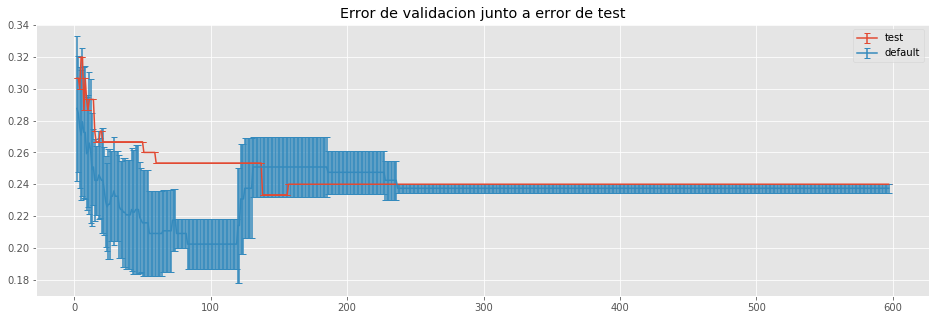

In [55]:
plt.figure(figsize=(16, 5))  # Puedes cambiar estos valores según tus necesidades
# eje x xantidad de vecinos y en el y cuanto es el errror
plt.title("Error de validacion junto a error de test")
plt.errorbar(test_results['param_min_samples_split'],1 - test_results['mean_test_score'],
             test_results['std_test_score'], label='test', capsize=3)  # 1 - [] para imprimir el error
plt.errorbar(cv_results_uniform['param_min_samples_split'],1 - cv_results_uniform['mean_test_score'],
             cv_results_uniform['std_test_score'], label='default', capsize=3) 
plt.legend(loc='upper right')
plt.show()

Apartir de ciertos vecinos visualizamos el mismo error que como en el entrenamiento haremos un un acercamiento sobre la parte de intereres

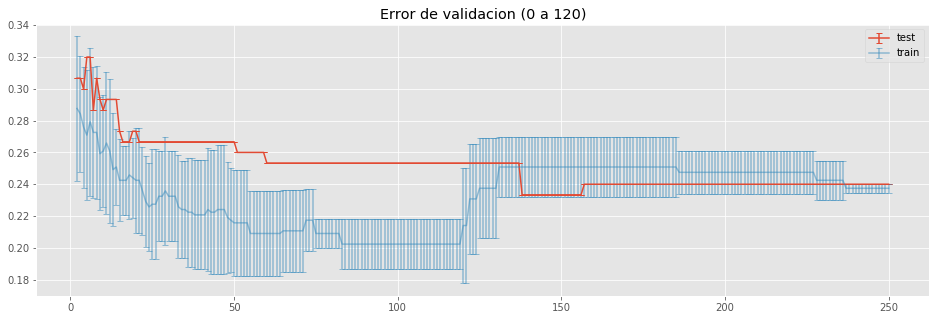

In [56]:
plt.figure(figsize=(16, 5))
plt.title("Error de validacion (0 a 120)")
subset = cv_results_uniform[cv_results_uniform['param_min_samples_split'] <= 250]
subset_test= test_results[test_results['param_min_samples_split']<= 250]
plt.errorbar(subset_test['param_min_samples_split'],1 - subset_test['mean_test_score'],
             subset_test['std_test_score'], label='test', capsize=3)  # 1 - [] para imprimir el error

plt.errorbar(subset['param_min_samples_split'],1 - subset['mean_test_score'],
             subset['std_test_score'], label='train', capsize=3,alpha=0.5)  # 1 - [] para imprimir el error
plt.legend(loc='upper right')
plt.show()

In [57]:
columna_show=[ 'param_min_samples_split', 'mean_test_score', 'rank_test_score']

In [58]:
cv_results_best_test = test_results[test_results['rank_test_score'] == 1].sort_values(by='param_min_samples_split')
cv_results_best_test.loc[:,columna_show]

param_min_samples_split  mean_test_score  rank_test_score
136                     138         0.766667                1
137                     139         0.766667                1
138                     140         0.766667                1
139                     141         0.766667                1
140                     142         0.766667                1
141                     143         0.766667                1
142                     144         0.766667                1
143                     145         0.766667                1
144                     146         0.766667                1
145                     147         0.766667                1
146                     148         0.766667                1
147                     149         0.766667                1
148                     150         0.766667                1
149                     151         0.766667                1
150                     152         0.766667                1
151                     153         0.766667                1
152                     154         0.766667                1
153                     155         0.766667                1
154                     156         0.766667                1

**Modelo selecionado con la validación cruzada**

In [59]:
test_results.loc[best_value_ind:best_value_ind, columna_show]

param_min_samples_split  mean_test_score  rank_test_score
117                     119         0.746667              461

**Modelo seleciondo con la regla de la desviación estandar**

In [60]:
test_results.loc[valor_ind_cruzado:valor_ind_cruzado,columna_show]

param_min_samples_split  mean_test_score  rank_test_score
119                     121         0.746667              461

In [61]:
# Aplicar la regla de una desviación estándar
best_model = cv_results[cv_results['rank_test_score'] == 1].sort_values(by='param_min_samples_split').iloc[0]
mejor_score = best_model['mean_test_score']
mejor_std = best_model['std_test_score']


#cv_results_best_error_plus_std =  mejor_error -  mejor_std

cv_results_aux = cv_results[
     cv_results['mean_test_score']>= threshold
].sort_values(by='param_min_samples_split', ascending=False)

cv_results_aux = cv_results_aux.loc[:, [
    'param_min_samples_split',
    'mean_test_score',
    'std_test_score',
    'rank_test_score'
    ]
]

cv_results_aux = cv_results_aux.sort_values(by='param_min_samples_split')
cv_results_aux

param_min_samples_split  mean_test_score  std_test_score  rank_test_score
47                       49         0.782609        0.032724               70
48                       50         0.784281        0.033265               65
49                       51         0.784281        0.033265               65
50                       52         0.784281        0.033265               65
51                       53         0.784281        0.033265               65
52                       54         0.784281        0.033265               65
53                       55         0.790970        0.026734               38
54                       56         0.790970        0.026734               38
55                       57         0.790970        0.026734               38
56                       58         0.790970        0.026734               38
57                       59         0.790970        0.026734               38
58                       60         0.790970        0.026734               38
59                       61         0.790970        0.026734               38
60                       62         0.790970        0.026734               38
61                       63         0.790970        0.026734               38
62                       64         0.790970        0.026734               38
63                       65         0.789298        0.025736               56
64                       66         0.789298        0.025736               56
65                       67         0.789298        0.025736               56
66                       68         0.789298        0.025736               56
67                       69         0.789298        0.025736               56
68                       70         0.789298        0.025736               56
69                       71         0.789298        0.025736               56
70                       72         0.782609        0.019608               70
71                       73         0.782609        0.019608               70
72                       74         0.782609        0.019608               70
73                       75         0.790970        0.009245               38
74                       76         0.790970        0.009245               38
75                       77         0.790970        0.009245               38
76                       78         0.790970        0.009245               38
..                      ...              ...             ...              ...
90                       92         0.797659        0.015857                1
91                       93         0.797659        0.015857                1
92                       94         0.797659        0.015857                1
93                       95         0.797659        0.015857                1
94                       96         0.797659        0.015857                1
95                       97         0.797659        0.015857                1
96                       98         0.797659        0.015857                1
97                       99         0.797659        0.015857                1
98                      100         0.797659        0.015857                1
99                      101         0.797659        0.015857                1
100                     102         0.797659        0.015857                1
101                     103         0.797659        0.015857                1
102                     104         0.797659        0.015857                1
103                     105         0.797659        0.015857                1
104                     106         0.797659        0.015857                1
105                     107         0.797659        0.015857                1
106                     108         0.797659        0.015857                1
107                     109         0.797659        0.015857                1
108                     110         0.797659        0.015857                1
109                     11

### Prueba a la hora de usar menos dimesiones

Como se comentó anterior mente  exitste una relación entre 'Frequency' y 'Monetary' por lo que se quiere observar si al reducir las dimensiones eliminando Frequency o Monetary hay mejoras, baja el rendimiento o se comporta de manera similar

In [62]:
dataset_train_X_reduce = dataset_train.loc[:,["Reciente","Frecuencia","Tiempo"]].astype(float)

dataset_test_X_reduce = dataset_test.loc[:, ["Reciente","Frecuencia","Tiempo"]].astype(float)


scaler = StandardScaler()

scaler.fit(dataset_train_X_reduce)

dataset_train_X_reduce_scaled = scaler.transform(dataset_train_X_reduce)
dataset_test_X_reduce_scaled = scaler.transform(dataset_test_X_reduce)

dataset_test_X_scaled

# ('Numero de muestras:', 598) auque pone este valor al usar  GridSearchCV me indica que son 477
print("Numero de muestras:", n_samples)

hyperparameters = {
     'min_samples_split': range(2, n_samples, 1)}
# hay
arbol_classifier = DecisionTreeClassifier()
modelCV_reduce = GridSearchCV(arbol_classifier,
                       hyperparameters,
                       cv=5,
                       scoring='accuracy', # parametro  top mejores en regresion mean scare error(skle pueda dar - std)
                       return_train_score=True)  # El warning es normal, pues el ejemplo es demasiado pequeño

np.random.seed(SEED_VALUE)  # Por como funciona KNN, no haría falta establecer una semilla. Pero lo ponemos igualmente
modelCV_reduce.fit(dataset_train_X_reduce, dataset_train_Y)  # En KNN no hay aprendizaje en sí, pero hay que ejecutar este comando para poder hacer inferencias

('Numero de muestras:', 598)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70...578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [63]:
cv_results_reduce = pd.DataFrame(modelCV_reduce.cv_results_)
cv_results.loc[:, columna_show].head()

param_min_samples_split  mean_test_score  rank_test_score
0                       2         0.712375              596
1                       3         0.715719              595
2                       4         0.724080              593
3                       5         0.729097              590
4                       6         0.720736              594

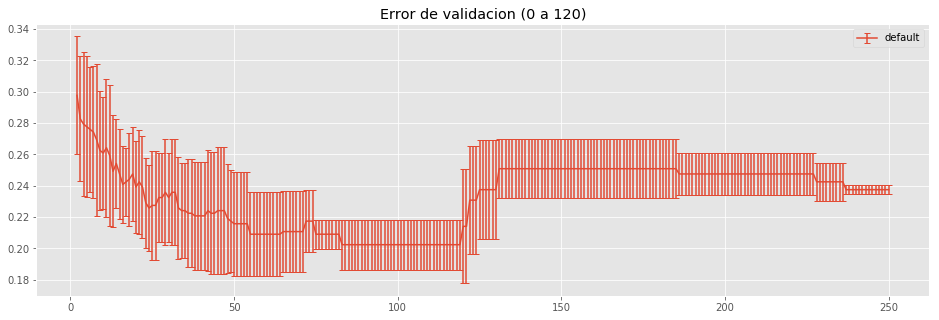

In [64]:
# Primera gráfica: De 0 a 110
plt.figure(figsize=(16, 5))
plt.title("Error de validacion (0 a 120)")
subset = cv_results_reduce[cv_results_reduce['param_min_samples_split'] <= 250]
plt.errorbar(subset['param_min_samples_split'],1 - subset['mean_test_score'],
             subset['std_test_score'], label='default', capsize=3)  # 1 - [] para imprimir el error
plt.legend(loc='upper right')
plt.show()

**Nota** Como podemos observar tiene un comportamiento similar que usar la variable comprobemos el resto de pasos


In [65]:
cv_results_best = cv_results_reduce[cv_results_reduce['rank_test_score'] == 1].sort_values(by='param_min_samples_split')
cv_results_best.loc[:, [ 'param_min_samples_split', 'mean_test_score', 'std_test_score', 'rank_test_score']]

param_min_samples_split  mean_test_score  std_test_score  rank_test_score
81                       83         0.797659        0.015857                1
82                       84         0.797659        0.015857                1
83                       85         0.797659        0.015857                1
84                       86         0.797659        0.015857                1
85                       87         0.797659        0.015857                1
86                       88         0.797659        0.015857                1
87                       89         0.797659        0.015857                1
88                       90         0.797659        0.015857                1
89                       91         0.797659        0.015857                1
90                       92         0.797659        0.015857                1
91                       93         0.797659        0.015857                1
92                       94         0.797659        0.015857                1
93                       95         0.797659        0.015857                1
94                       96         0.797659        0.015857                1
95                       97         0.797659        0.015857                1
96                       98         0.797659        0.015857                1
97                       99         0.797659        0.015857                1
98                      100         0.797659        0.015857                1
99                      101         0.797659        0.015857                1
100                     102         0.797659        0.015857                1
101                     103         0.797659        0.015857                1
102                     104         0.797659        0.015857                1
103                     105         0.797659        0.015857                1
104                     106         0.797659        0.015857                1
105                     107         0.797659        0.015857                1
106                     108         0.797659        0.015857                1
107                     109         0.797659        0.015857                1
108                     110         0.797659        0.015857                1
109                     111         0.797659        0.015857                1
110                     112         0.797659        0.015857                1
111                     113         0.797659        0.015857                1
112                     114         0.797659        0.015857                1
113                     115         0.797659        0.015857                1
114                     116         0.797659        0.015857                1
115                     117         0.797659        0.015857                1
116                     118         0.797659        0.015857                1
117                     119         0.797659        0.015857                1

In [66]:
# Aplicar la regla de una desviación estándar
best_model = cv_results_reduce[cv_results_reduce['rank_test_score'] == 1].sort_values(by='param_min_samples_split').iloc[0]
mejor_score = best_model['mean_test_score']
mejor_std = best_model['std_test_score']


threshold =  mejor_score -  mejor_std

cv_results_aux = cv_results[
     cv_results['mean_test_score']>= threshold
].sort_values(by='param_min_samples_split', ascending=False)

cv_results_aux = cv_results_aux.loc[:, [
    'param_min_samples_split',
    'mean_test_score',
    'std_test_score',
    'rank_test_score'
    ]
]

cv_results_aux = cv_results_aux.sort_values(by='param_min_samples_split',ascending=False)
cv_results_aux.head()

param_min_samples_split  mean_test_score  std_test_score  rank_test_score
119                     121         0.785953        0.036438               63
118                     120         0.785953        0.036438               63
117                     119         0.797659        0.015857                1
116                     118         0.797659        0.015857                1
115                     117         0.797659        0.015857                1

In [67]:
# Hacemos un Grid Search sin Cross Validation, únicamente con entrenamieto y validación (PredefinedSplit)

# Creamos una lista con `-1` para los índices de entrenamiento y `0` para los índices de validación
split_test_fold = [-1]*len(dataset_train_Y) + [0]*len(dataset_test_Y)
ps = PredefinedSplit(test_fold=split_test_fold)

# Juntamos los conjuntos de entrenamiento y test, fingiendo que son un sólo conjunto de entrenamiento-validación
dataset_all_X_scaled = np.vstack([dataset_train_X_reduce_scaled, dataset_test_X_reduce_scaled])
dataset_all_Y = pd.concat([dataset_train_Y, dataset_test_Y])

arbol_classifier = DecisionTreeClassifier()
modelCV_test_reduce = GridSearchCV(arbol_classifier,
                       hyperparameters,
                       cv=ps,
                       scoring='accuracy',
                       return_train_score=True)

np.random.seed(SEED_VALUE)  # Por como funciona KNN, no haría falta establecer semilla. Pero lo ponemos igualmente
modelCV_test_reduce.fit(dataset_all_X_scaled, dataset_all_Y)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70...578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597]},
       pre_dispatch='2*n_jobs', refit=True, return_train_s

In [68]:
test_results_reduce = pd.DataFrame(modelCV_test_reduce.cv_results_)
#test_results.loc[:, [ 'param_n_neighbors', 'mean_test_score', 'rank_test_score']]

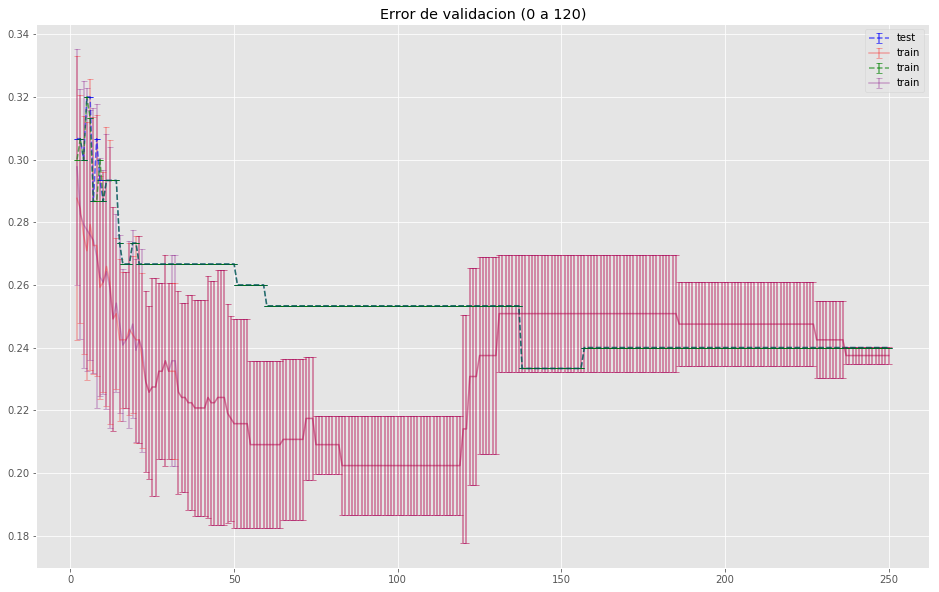

In [69]:
plt.figure(figsize=(16, 10))
plt.title("Error de validacion (0 a 120)")

subset_reduce = cv_results_reduce[test_results_reduce['param_min_samples_split'] <= 250]

subset_test_reduce= test_results_reduce[test_results['param_min_samples_split']<= 250]

subset = cv_results[cv_results['param_min_samples_split'] <= 250]

subset_test= test_results[test_results['param_min_samples_split']<= 250]

plt.errorbar(subset_test['param_min_samples_split'],1 - subset_test['mean_test_score'],
             subset_test['std_test_score'], label='test', capsize=3,alpha=0.6,  color='blue',linestyle='--')  # 1 - [] para imprimir el error

plt.errorbar(subset['param_min_samples_split'],1 - subset['mean_test_score'],
             subset['std_test_score'], label='train', capsize=3,alpha=0.3, color='red', )  # 1 - [] para imprimir el error

plt.errorbar(subset_test_reduce['param_min_samples_split'],1 - subset_test_reduce['mean_test_score'],
             subset_test_reduce['std_test_score'], label='train', capsize=3,alpha=0.6,  color='green', linestyle='--')  # 1 - [] para imprimir el error

plt.errorbar(subset_reduce['param_min_samples_split'],1 - subset_reduce['mean_test_score'],
             subset_reduce['std_test_score'], label='train', capsize=3,alpha=0.3, color='purple')  # 1 - [] para imprimir el error

plt.legend(loc='upper right')
plt.show()

In [70]:
cv_results_best_test = subset_test_reduce[subset_test_reduce['rank_test_score'] == 1].sort_values(by='param_min_samples_split')
cv_results_best_test.loc[:, [ 'param_min_samples_split', 'mean_test_score', 'std_test_score', 'rank_test_score']]

param_min_samples_split  mean_test_score  std_test_score  rank_test_score
136                     138         0.766667             0.0                1
137                     139         0.766667             0.0                1
138                     140         0.766667             0.0                1
139                     141         0.766667             0.0                1
140                     142         0.766667             0.0                1
141                     143         0.766667             0.0                1
142                     144         0.766667             0.0                1
143                     145         0.766667             0.0                1
144                     146         0.766667             0.0                1
145                     147         0.766667             0.0                1
146                     148         0.766667             0.0                1
147                     149         0.766667             0.0                1
148                     150         0.766667             0.0                1
149                     151         0.766667             0.0                1
150                     152         0.766667             0.0                1
151                     153         0.766667             0.0                1
152                     154         0.766667             0.0                1
153                     155         0.766667             0.0                1
154                     156         0.766667             0.0                1

**Modelo selecionado por validación cruzada**

In [71]:
subset_test_reduce.loc[best_value_ind:best_value_ind, [ 'param_min_samples_split', 'mean_test_score', 'std_test_score', 'rank_test_score']]

param_min_samples_split  mean_test_score  std_test_score  rank_test_score
117                     119         0.746667             0.0              461

**Modelo selecionado por regla de la desviación estándar**

In [72]:
subset_test_reduce.loc[valor_ind_cruzado:valor_ind_cruzado, [ 'param_min_samples_split', 'mean_test_score', 'std_test_score', 'rank_test_score']]

param_min_samples_split  mean_test_score  std_test_score  rank_test_score
119                     121         0.746667             0.0              461

En ambos casos comprobamos que los modelos selecionados empeoran entre 1.4 % en comparación 

Comprobamdo si se encuentra un minimo global entre el 20 y el 26 o entorno al 40

En comparación con el de usar todos los modelos hay cierta mejora permitiendo que haya una mayor simplificación del modelo ya que al usar mas vecino suavizamos la frontera

Otro tipo de reduccion

In [73]:
dataset_train_X_reduce = dataset_train.loc[:,["Reciente","Frecuencia","Cantidad_Sangre"]].astype(float)

dataset_test_X_reduce = dataset_test.loc[:, ["Reciente","Frecuencia","Cantidad_Sangre"]].astype(float)


scaler = StandardScaler()

scaler.fit(dataset_train_X_reduce)

dataset_train_X_reduce_scaled = scaler.transform(dataset_train_X_reduce)
dataset_test_X_reduce_scaled = scaler.transform(dataset_test_X_reduce)

dataset_test_X_scaled

# ('Numero de muestras:', 598) auque pone este valor al usar  GridSearchCV me indica que son 477
print("Numero de muestras:", n_samples)


# hay
arbol_clasificador = DecisionTreeClassifier()
modelCV_reduce_2 = GridSearchCV(arbol_clasificador,
                       hyperparameters,
                       cv=5,
                       scoring='accuracy', # parametro  top mejores en regresion mean scare error(skle pueda dar - std)
                       return_train_score=True)  # El warning es normal, pues el ejemplo es demasiado pequeño

np.random.seed(SEED_VALUE)  # Por como funciona KNN, no haría falta establecer una semilla. Pero lo ponemos igualmente
modelCV_reduce_2.fit(dataset_train_X_reduce, dataset_train_Y)  # En KNN no hay aprendizaje en sí, pero hay que ejecutar este comando para poder hacer inferencias

('Numero de muestras:', 598)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70...578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [74]:
modelCV_reduce_2.fit(dataset_train_X_reduce, dataset_train_Y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70...578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [75]:
cv_results_reduce_2 = pd.DataFrame(modelCV_reduce_2.cv_results_)
cv_results.loc[:, columna_show].head()

param_min_samples_split  mean_test_score  rank_test_score
0                       2         0.712375              596
1                       3         0.715719              595
2                       4         0.724080              593
3                       5         0.729097              590
4                       6         0.720736              594

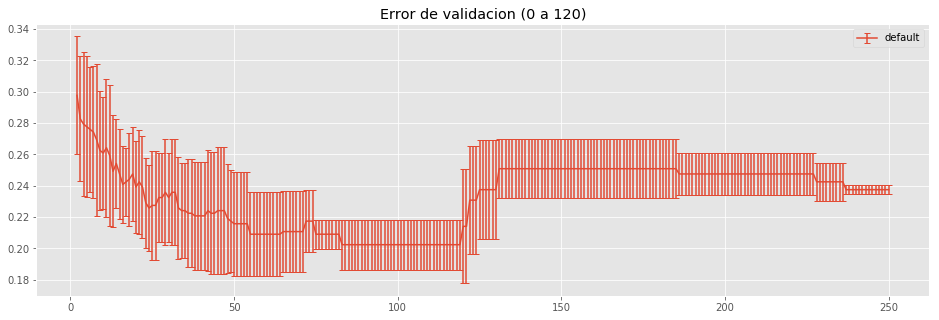

In [76]:
# Primera gráfica: De 0 a 110
plt.figure(figsize=(16, 5))
plt.title("Error de validacion (0 a 120)")
subset = cv_results_reduce[cv_results_reduce['param_min_samples_split'] <= 250]
plt.errorbar(subset['param_min_samples_split'],1 - subset['mean_test_score'],
             subset['std_test_score'], label='default', capsize=3)  # 1 - [] para imprimir el error
plt.legend(loc='upper right')
plt.show()

In [77]:
cv_results_best = cv_results_reduce_2[cv_results_reduce_2['rank_test_score'] == 1].sort_values(by='param_min_samples_split')
cv_results_best.loc[:, columna_show]

param_min_samples_split  mean_test_score  rank_test_score
52                      54         0.770903                1
53                      55         0.770903                1
54                      56         0.770903                1
55                      57         0.770903                1
56                      58         0.770903                1
57                      59         0.770903                1
58                      60         0.770903                1
59                      61         0.770903                1
60                      62         0.770903                1
61                      63         0.770903                1
62                      64         0.770903                1
63                      65         0.770903                1
64                      66         0.770903                1
68                      70         0.770903                1
69                      71         0.770903                1
70                      72         0.770903                1
71                      73         0.770903                1
72                      74         0.770903                1
73                      75         0.770903                1
74                      76         0.770903                1
75                      77         0.770903                1
76                      78         0.770903                1
77                      79         0.770903                1
78                      80         0.770903                1
79                      81         0.770903                1
80                      82         0.770903                1
81                      83         0.770903                1
82                      84         0.770903                1
83                      85         0.770903                1
84                      86         0.770903                1

EL comportamientoe es peor como podemos observar almenos en el train

Se ve que empeora como se comento anteriormente en comparacion a lo anterior

### Ejercio 3.

Repite el ejercicio 2 pero para el problema de regresión [Energy Efficiency](https://archive.ics.uci.edu/dataset/242/energy+efficiency) con la variable de salida
cooling load. Al ser un problema de regresión deberás utilizar KNeighborsRegressor, y como medida
de error de entrenamiento y test el MSE.

Nota. Al ser un problema de regresión, para estimar tanto el error de entrenamiento como el de
test (MSE) es necesario desestandarizar los errores calculados. Para desestandarizar el campo
`mean_test_score`, únicamente será necesario multiplicar cada valor por la varianza (cuadrado de la
desviación estándar) de las observaciones de Y del conjunto de entrenamiento. No se debe restar la
media, ya que los campos `splitX_test_score` se calculan como la diferencia entre el valor de
groundtruth y la predicción para cada dato de test, por lo que todas las operaciones de adición o
substracción ya se han tenido en cuenta. De forma similar, para desestandarizar el campo
`std_test_score`, únicamente será necesario multiplicar cada valor por la varianza de las
observaciones de Y del conjunto de entrenamiento.



In [78]:
!pwd

/home/usc/cursos/curso111/AE/5_arboles


In [79]:
DATASET_ENERGY='./data/energy+efficiency/EnergyEfficiency.data'
# Leer el archivo de datos y obtener la primera fila como nombres de columnas
data = pd.read_csv(DATASET_ENERGY)
NAME_ENERGY = data.columns.tolist()
#print(NAME_ENERGY)
#NAME_ENERGY=["Reciente","Frecuencia","Cantidad_Sangre","Tiempo","Donacion_marzo"]


if os.path.exists(DATASET_ENERGY):
    dataset_energy = pd.read_csv(DATASET_ENERGY, 
                          delimiter=DATASET_DELIMITER,
                          header=None,
                          skiprows=1,
                          names = NAME_ENERGY)
else:
    dataset_energy = d.DataFrame(np.array(
    [[0, 3, 2, 1], 
    [3, 0, 3, 0], 
    [0, 3, -1, 0], 
    [3, 0, 0, 1], 
    [1, 2, 1, 1], 
    [2, 1, 0, 0]]), columns=['X1', 'X2', 'X3', 'Y'])
    
dataset_energy.head()

X1     X2     X3      X4   X5  X6   X7  X8  Y2\t\t
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0   21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0   21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0   21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0   21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0   28.28

In [80]:
print('Tipo del dato de cada columna:')
print(dataset_energy.dtypes)
# Comprobamos si hay nan
print("\n Cantidad de valores NaN en cada columna:")
dataset_energy.isna().sum()

Tipo del dato de cada columna:
X1        float64
X2        float64
X3        float64
X4        float64
X5        float64
X6          int64
X7        float64
X8          int64
Y2\t\t    float64
dtype: object

 Cantidad de valores NaN en cada columna:


X1        0
X2        0
X3        0
X4        0
X5        0
X6        0
X7        0
X8        0
Y2\t\t    0
dtype: int64

In [81]:
# Excluir la columna de la etiqueta
columns = dataset_energy.columns[:-1]

# Crear una cuadrícula de subtramas 2x4 para histogramas y gráficos de dispersión
fig, axs = plt.subplots(2, 4, figsize=(20, 5))

# Visualizar histogramas para todas las columnas
for i, column in enumerate(columns):
    row = i // 4  # Determinar la fila de la subtrama
    col = i % 4   # Determinar la columna de la subtrama
    axs[row, col].hist(dataset_energy[column], bins=20, alpha=0.7)
    axs[row, col].set_title("Histogram of {}".format(column))
# Ajustar el diseño
plt.tight_layout()
plt.show()

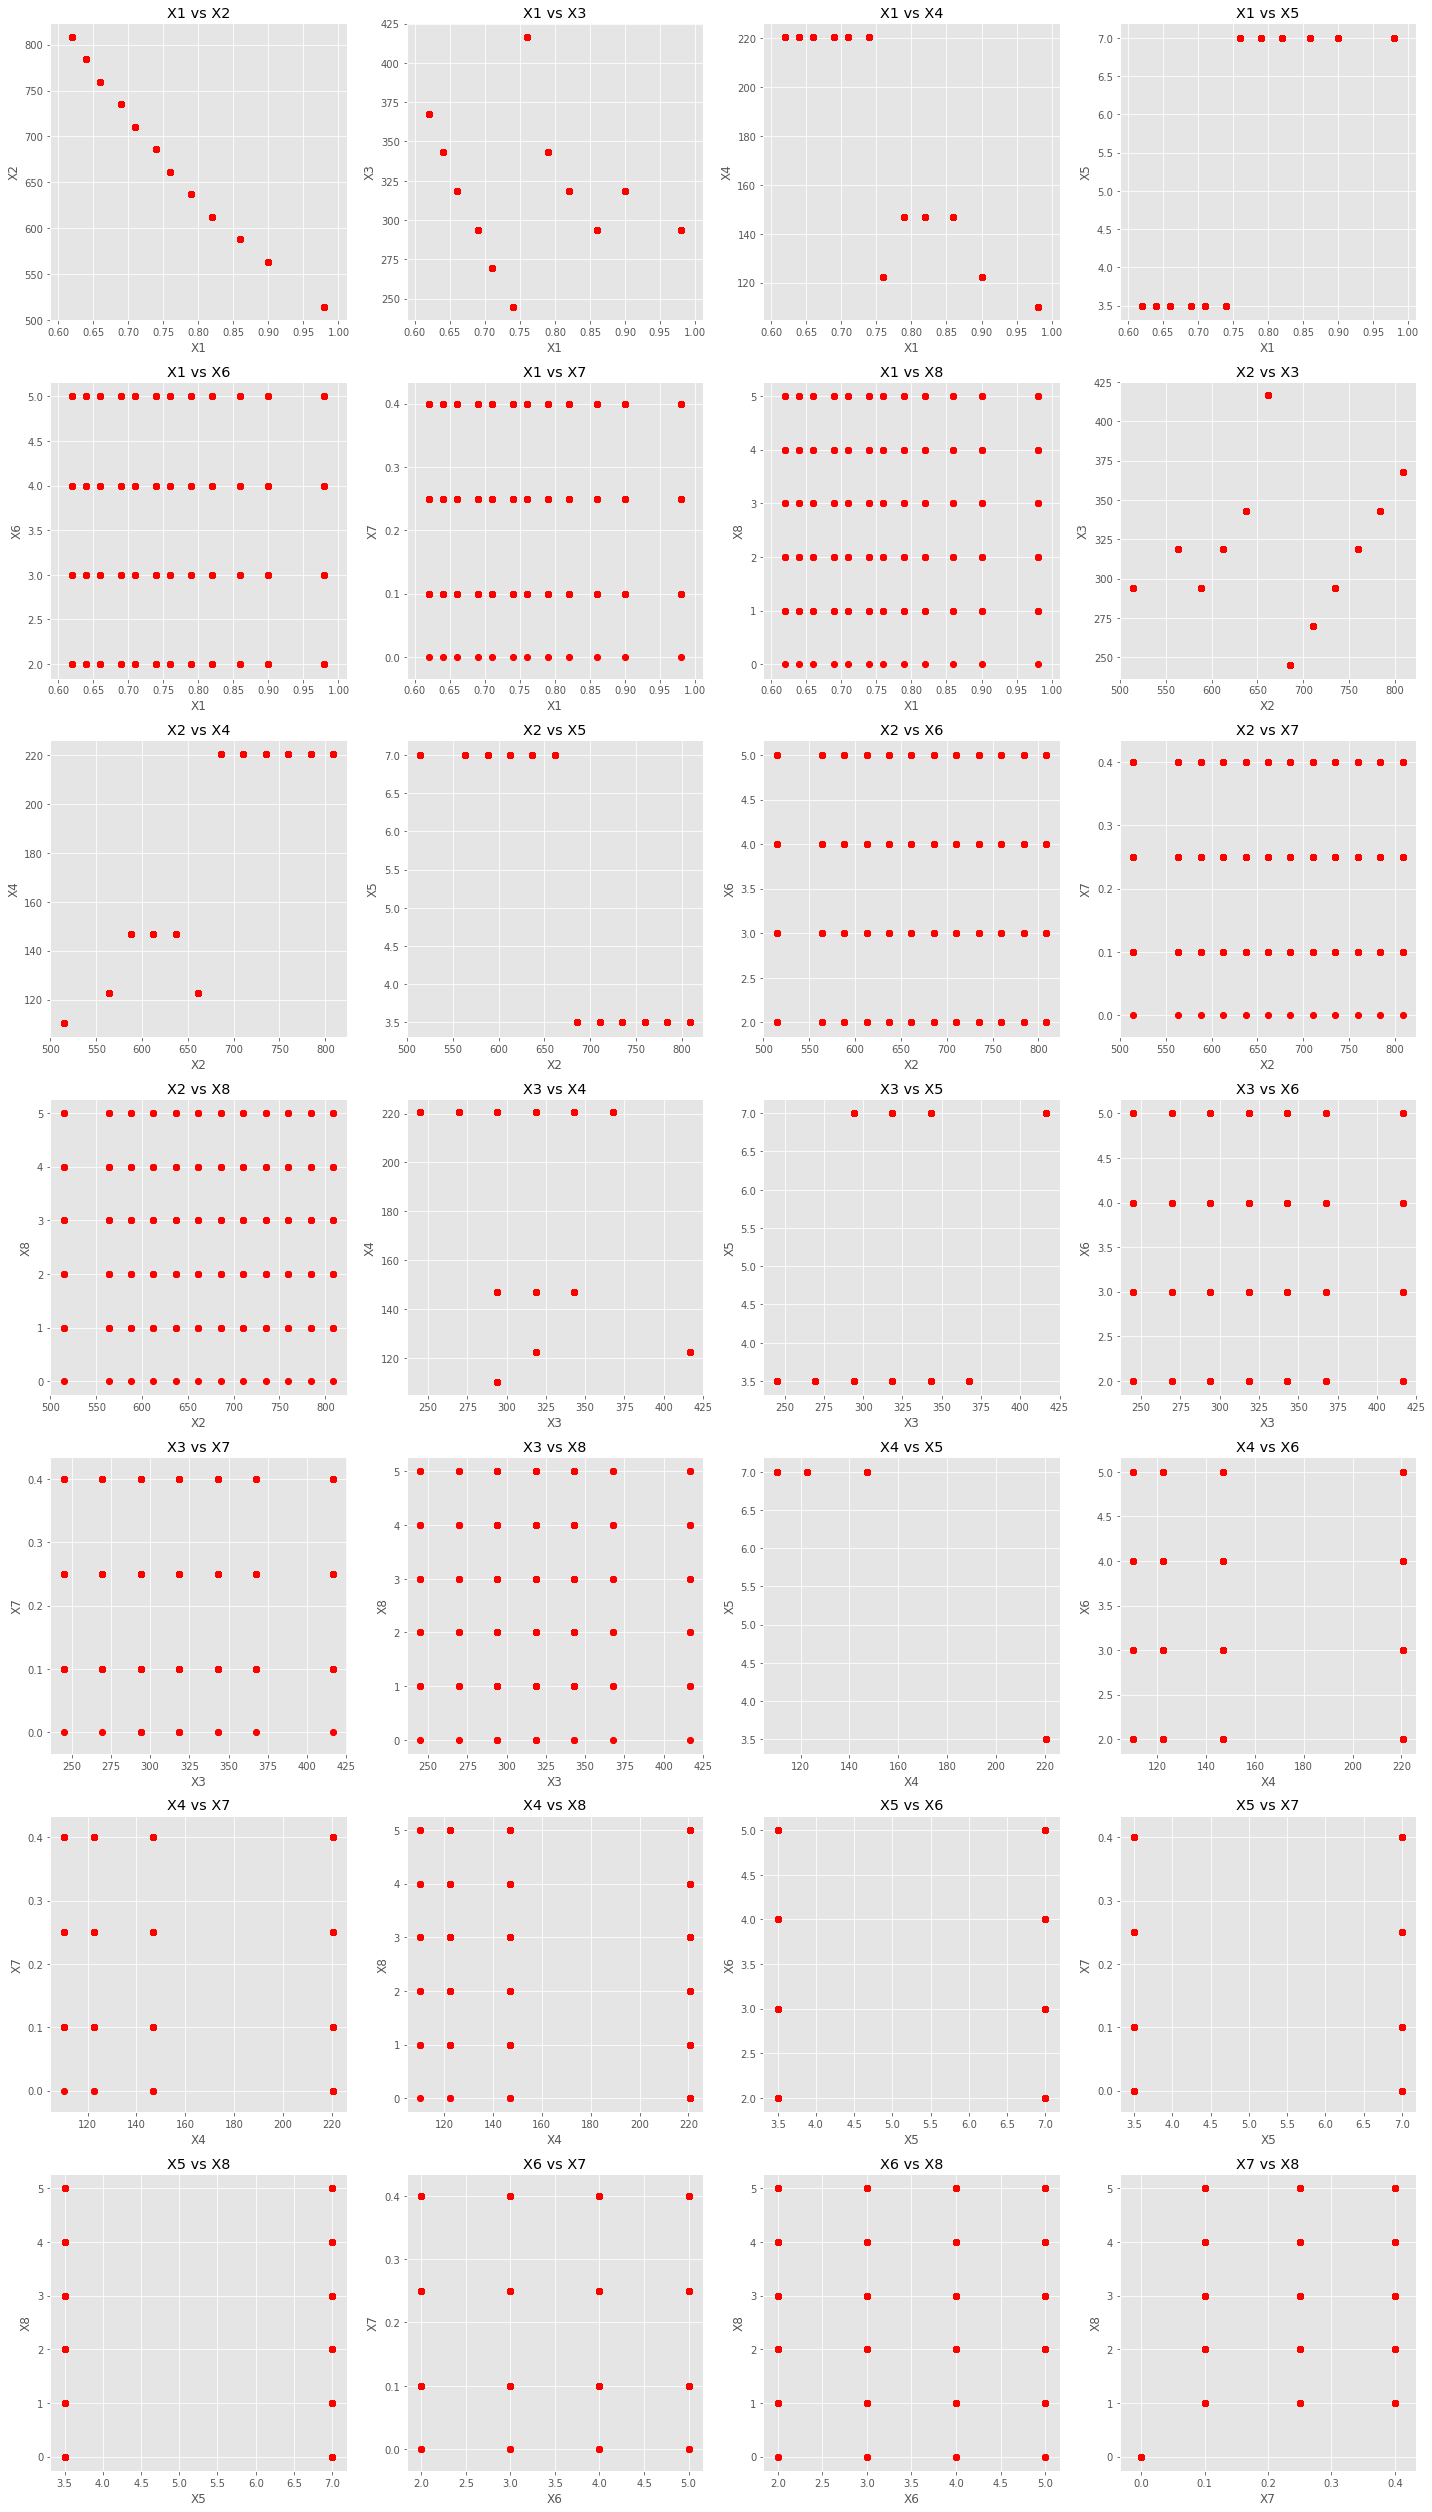

In [82]:
# Crear todas las combinaciones posibles de pares de variables
combinations = list(itertools.combinations(columns, 2))

num_cols=4
# Calcular el número de filas necesario para acomodar todas las combinaciones
num_combinations = len(combinations)
num_rows = num_combinations // num_cols + (num_combinations % num_cols > 0)

# Crear una cuadrícula de subtramas con un número suficiente de filas para todas las combinaciones
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))  # Ajustar el tamaño de figura según sea necesario

# Visualizar gráficos de dispersión para todas las combinaciones
for j, (var1, var2) in enumerate(combinations):
    row = j // num_cols
    col = j % num_cols
    axs[row, col].scatter(dataset_energy[var1], 
                          dataset_energy[var2], 
                          c='red')
    axs[row, col].set_title("{} vs {}".format(var1, var2))
    axs[row, col].set_xlabel(var1)
    axs[row, col].set_ylabel(var2)

# Ajustar el diseño para que no haya superposición
plt.tight_layout()

# Mostrar la figura
plt.show()

Se puede observar una cierta relación inversamente proporcional entre X1 Y X2  para otras variables no se opserva relaciones entre ellas.


División de los datos en entrenamiento (80%) y test (20%):

In [83]:
dataset_train_energy, dataset_test_energy = train_test_split(dataset_energy,
                            test_size=0.2, random_state=SEED_VALUE,
                                    )
dataset_test_energy.loc[:,columns].head()

X1     X2     X3     X4   X5  X6    X7  X8
285  0.62  808.5  367.5  220.5  3.5   3  0.10   5
101  0.90  563.5  318.5  122.5  7.0   3  0.10   2
581  0.90  563.5  318.5  122.5  7.0   3  0.40   2
352  0.79  637.0  343.0  147.0  7.0   2  0.25   2
726  0.90  563.5  318.5  122.5  7.0   4  0.40   5

Este paso no es necesario

In [84]:
#imp = SimpleImputer(missing_values=np.nan, fill_value='mean')
#imp = imp.fit(dataset_train_energy)  # La media la calculamos SÓLO a partir del conjunto de train

# Los valores van a ser los mismos que antes, pues no tenemos datos faltantes
#dataset_train_prep_energy = imp.transform(dataset_train_energy)
#dataset_test_prep_energy = imp.transform(dataset_test_energy)

#dataset_test_prep_energy

In [85]:

#dataset_train_energy = pd.DataFrame(dataset_train_prep_energy,
#                             columns=dataset_train_energy.columns,
#                             index=dataset_train_energy.index)
#dataset_test_energy = pd.DataFrame(dataset_test_prep_energy,
#                            columns=dataset_test_energy.columns,
#                            index=dataset_test_energy.index)

#dataset_test_energy.loc[:,columns]

**Estandarización de los datos**

Esto hay que hacerlo **ANTES** de dividir en conjuntos de entrenamiento y test. Además, como es un problema de **regresion**, estandarizaremos la variable dependientetambien .


In [86]:

scaler = StandardScaler()

scaler.fit(dataset_train_energy)

dataset_train_scaled_energy = scaler.transform(dataset_train_energy)

dataset_test_scaled_energy = scaler.transform(dataset_test_energy)

dataset_test_scaled_energy

array([[-1.33525558,  1.52364121,  1.12278518, ..., -0.99633936,
         1.40105783, -1.09538181],
       [ 1.28346607, -1.23517832,  0.00816901, ..., -0.99633936,
        -0.54374136,  0.54110007],
       [ 1.28346607, -1.23517832,  0.00816901, ...,  1.26941014,
        -0.54374136,  1.17051617],
       ...,
       [ 0.90936298, -0.95929637, -0.54913907, ..., -0.99633936,
         0.10452504,  0.16662393],
       [ 0.53525988, -0.68341441,  0.00816901, ...,  1.26941014,
         0.75279143,  0.40992763],
       [ 0.25468256, -0.40753246,  0.56547709, ...,  1.26941014,
         0.10452504,  1.47094335]])

In [87]:

print("mean [X1, X2, X3, X4, X5, X6, X7, X8,Y2]: {}".format(scaler.mean_))
print("std [X1, X2, X3, X4, X5, X6, X7, X8,Y2]: {}".format(scaler.scale_))


mean [X1, X2, X3, X4, X5, X6, X7, X8,Y2]: [7.62768730e-01 6.73191368e+02 3.18140879e+02 1.77525244e+02
 5.19869707e+00 3.47394137e+00 2.31921824e-01 2.83876221e+00
 2.43248697e+01]
std [X1, X2, X3, X4, X5, X6, X7, X8,Y2]: [ 0.1069224  88.80609907 43.96132191 45.46444155  1.74924784  1.11918644
  0.13240652  1.54257571  9.45320583]


In [88]:
dataset_train_scaled_energy = pd.DataFrame(dataset_train_scaled_energy,
                             columns=dataset_train_energy.columns,
                             index=dataset_train_energy.index)
dataset_test_scaled_energy = pd.DataFrame(dataset_test_scaled_energy,
                            columns=dataset_test_energy.columns,
                            index=dataset_test_energy.index)


dataset_test_scaled_energy.loc[:,columns].head()

X1        X2        X3        X4        X5        X6        X7  \
285 -1.335256  1.523641  1.122785  0.945239 -0.971101 -0.423470 -0.996339   
101  1.283466 -1.235178  0.008169 -1.210292  1.029759 -0.423470 -0.996339   
581  1.283466 -1.235178  0.008169 -1.210292  1.029759 -0.423470  1.269410   
352  0.254683 -0.407532  0.565477 -0.671409  1.029759 -1.316976  0.136535   
726  1.283466 -1.235178  0.008169 -1.210292  1.029759  0.470037  1.269410   

           X8  
285  1.401058  
101 -0.543741  
581 -0.543741  
352 -0.543741  
726  1.401058

**SEPARAMOS LAS VARIABLES**

In [89]:
dataset_train_X_energy = dataset_train_scaled_energy.loc[:, NAME_ENERGY[:-1]].astype(float)
dataset_train_Y_energy = dataset_train_scaled_energy.loc[:, NAME_ENERGY[-1]]
dataset_train_X_energy.head()

X1        X2        X3        X4        X5        X6        X7  \
663 -0.961152  0.971877  0.008169  0.945239 -0.971101  1.363543  1.269410   
712 -1.148204  1.247759  0.565477  0.945239 -0.971101 -1.316976  1.269410   
161  0.254683 -0.407532  0.565477 -0.671409  1.029759 -0.423470 -0.996339   
509 -0.493524  0.420113 -1.106447  0.945239 -0.971101 -0.423470  0.136535   
305  0.254683 -0.407532  0.565477 -0.671409  1.029759 -0.423470  0.136535   

           X8  
663  0.104525  
712  0.752791  
161  0.104525  
509  1.401058  
305 -1.192008

In [90]:
dataset_test_X_energy = dataset_test_scaled_energy.loc[:, NAME_ENERGY[:-1]].astype(float)
dataset_test_Y_energy = dataset_test_scaled_energy.loc[:, NAME_ENERGY[-1]]

dataset_test_Y_energy.head()

285   -1.095382
101    0.541100
581    1.170516
352    2.066509
726    1.530183
Name: Y2\t\t, dtype: float64

In [91]:
#Expected n_neighbors <= n_samples,  but n_samples = 491, n_neighbors = 492
# Expected n_neighbors <= n_samples,  n_samples = 477
# Si solo necesitas el número de muestras
n_samples = dataset_train_X_energy.shape[0]

# ('Numero de muestras:', 614) auque pone este valor al usar  GridSearchCV me indica que son 491
print("Numero de muestras:", n_samples)

hyperparameters = {
    'min_samples_split': range(2, n_samples, 1)}
  


('Numero de muestras:', 614)


In [92]:
dataset_train_X_energy.index.equals(dataset_train_Y_energy.index)

True

In [93]:
arbol = DecisionTreeRegressor()
modelCV_energy = GridSearchCV(arbol,
                       hyperparameters,
                       cv=5,
                       scoring="neg_mean_squared_error",
                       return_train_score=True)

# Por como funciona KNN, no haría falta establecer una semilla. Pero lo ponemos igualmente
np.random.seed(SEED_VALUE)

# En KNN no hay aprendizaje en sí, pero hay que ejecutar este comando para poder hacer inferencias
modelCV_energy.fit(dataset_train_X_energy, dataset_train_Y_energy)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70...594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [94]:
cv_results_energy = pd.DataFrame(modelCV_energy.cv_results_)
cv_results_energy.loc[:, [ 'param_min_samples_split', 'mean_test_score', 'std_test_score', 'rank_test_score']]
cv_results_energy['destandardized_mean_test_score'] = (-1) * cv_results_energy['mean_test_score'] * (scaler.scale_[8]**2)
cv_results_energy['destandardized_std_test_score'] = cv_results_energy['std_test_score'] * (scaler.scale_[8]**2)

In [95]:
cv_results_best = cv_results_energy[cv_results_energy['rank_test_score'] == 1]
colums_selected= [ 'param_min_samples_split', 'mean_test_score', 'std_test_score'
                        ,'destandardized_mean_test_score','destandardized_std_test_score','rank_test_score']
cv_results_best.loc[:, colums_selected]

param_min_samples_split  mean_test_score  std_test_score  \
13                      15        -0.038057        0.007705   

    destandardized_mean_test_score  destandardized_std_test_score  \
13                        3.400928                       0.688564   

    rank_test_score  
13                1

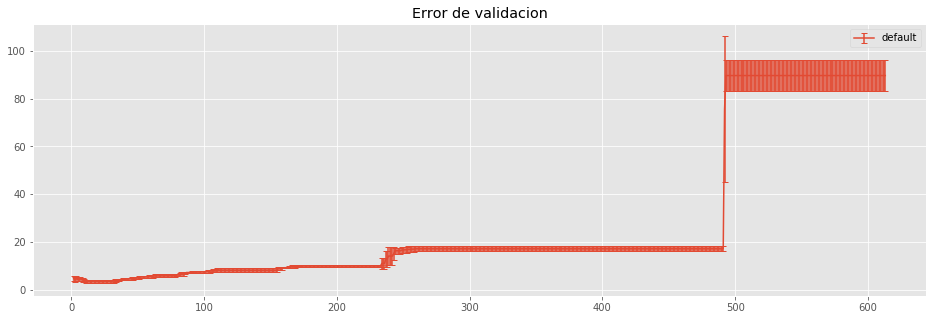

In [96]:
# separamos los pesos basados en cada 
cv_results_uniform = cv_results

plt.figure(figsize=(16, 5))  # Puedes cambiar estos valores según tus necesidades
# eje x xantidad de vecinos y en el y cuanto es el errror
plt.title("Error de validacion")
plt.errorbar(cv_results_energy['param_min_samples_split'],cv_results_energy['destandardized_mean_test_score'],
             cv_results_energy['destandardized_std_test_score'], label='default', capsize=3)  # 1 - [] para imprimir el error
plt.legend(loc='upper right')
plt.show()

In [97]:
cv_results_best = cv_results_energy[cv_results_energy['rank_test_score'] == 1]
cv_results_best.loc[:, colums_selected]

param_min_samples_split  mean_test_score  std_test_score  \
13                      15        -0.038057        0.007705   

    destandardized_mean_test_score  destandardized_std_test_score  \
13                        3.400928                       0.688564   

    rank_test_score  
13                1

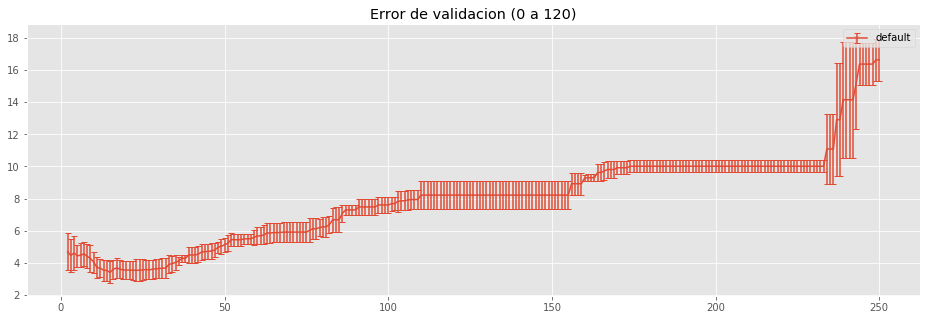

In [98]:
# Primera gráfica: De 0 a 110
plt.figure(figsize=(16, 5))
plt.title("Error de validacion (0 a 120)")
subset = cv_results_energy[cv_results_energy['param_min_samples_split'] <= 250]
plt.errorbar(subset['param_min_samples_split'],subset['destandardized_mean_test_score'],
             subset['destandardized_std_test_score'], label='default', capsize=3)  # 1 - [] para imprimir el error
plt.legend(loc='upper right')
plt.show()

In [99]:
cv_results_best = cv_results_energy
cv_results_best.loc[:,colums_selected].sort_values(by='rank_test_score').head()

param_min_samples_split  mean_test_score  std_test_score  \
13                      15        -0.038057        0.007705   
12                      14        -0.039374        0.007378   
22                      24        -0.039528        0.007529   
21                      23        -0.039545        0.007727   
20                      22        -0.039552        0.006713   

    destandardized_mean_test_score  destandardized_std_test_score  \
13                        3.400928                       0.688564   
12                        3.518605                       0.659292   
22                        3.532324                       0.672770   
21                        3.533857                       0.690532   
20                        3.534534                       0.599862   

    rank_test_score  
13                1  
12                2  
22                3  
21                4  
20                5

In [100]:
cv_results_best = cv_results_energy[cv_results_energy['rank_test_score'] == 1]
cv_results_best.loc[:, colums_selected]
best_value=cv_results_energy.loc[:, columna_show]
best_value_ind_energy=cv_results_best.index[-1]
print(best_value_ind_energy)

13


In [101]:
# Aplicar la regla de una desviación estándar
best_model = cv_results_energy[cv_results_energy['rank_test_score'] == 1].sort_values(by='param_min_samples_split').iloc[0]
mejor_score = best_model['destandardized_mean_test_score']
mejor_std = best_model['destandardized_std_test_score']

threshold_energy=mejor_score+mejor_std
print(threshold_energy)
cv_results_aux = cv_results_energy[
     cv_results_energy['destandardized_mean_test_score']<=threshold_energy
].sort_values(by='param_min_samples_split', ascending=False)

cv_results_aux = cv_results_aux.loc[:, colums_selected]

cv_results_aux = cv_results_aux.sort_values(by='param_min_samples_split')
cv_results_aux


4.08949175133675


param_min_samples_split  mean_test_score  std_test_score  \
8                       10        -0.045247        0.007273   
9                       11        -0.041384        0.007134   
10                      12        -0.041090        0.006434   
11                      13        -0.039621        0.007394   
12                      14        -0.039374        0.007378   
13                      15        -0.038057        0.007705   
14                      16        -0.040312        0.006582   
15                      17        -0.041166        0.007187   
16                      18        -0.040390        0.006240   
17                      19        -0.039714        0.006353   
18                      20        -0.039707        0.006345   
19                      21        -0.039716        0.006325   
20                      22        -0.039552        0.006713   
21                      23        -0.039545        0.007727   
22                      24        -0.039528        0.007529   
23                      25        -0.039812        0.007298   
24                      26        -0.040042        0.006744   
25                      27        -0.039810        0.006576   
26                      28        -0.040297        0.006593   
27                      29        -0.040610        0.006626   
28                      30        -0.040724        0.006860   
29                      31        -0.040998        0.007135   
30                      32        -0.041061        0.007107   
31                      33        -0.043628        0.006236   
32                      34        -0.044191        0.005620   
33                      35        -0.045031        0.005037   

    destandardized_mean_test_score  destandardized_std_test_score  \
8                         4.043421                       0.649945   
9                         3.698216                       0.637538   
10                        3.671917                       0.574947   
11                        3.540693                       0.660771   
12                        3.518605                       0.659292   
13                        3.400928                       0.688564   
14                        3.602430                       0.588147   
15                        3.678765                       0.642282   
16                        3.609391                       0.557592   
17                        3.548983                       0.567694   
18                        3.548302                       0.567028   
19                        3.549153                       0.565258   
20                        3.534534                       0.599862   
21                        3.533857                       0.690532   
22                        3.532324                       0.672770   
23                        3.557725                       0.652162   
24                        3.578248                       0.602643   
25                        3.557523                       0.587670   
26                        3.601093                       0.589171   
27                        3.629008                       0.592112   
28                        3.639226                       0.613017   
29                        3.663723                       0.637579   
30                        3.669379                       0.635144   
31                        3.898716                       0.557296   
32                        3.949005                       0.502201   
33                        4.024066                       0.450152   

    rank_test_score  
8                26  
9                22  
10               20  
11                6  
12                2  
13                1  
14               14  
15               21  
16               15  
17                8  
18                7  
19                9  
20                5  
21                4  
22                3  
23               11  
24               12  
25               10  
26               13

In [102]:
valor_ind_cruzado_energy=cv_results_aux.index[-1]#get_val_cross_validater(cv_results_aux
                         #                 ,best_value_ind_energy)
print(valor_ind_cruzado_energy)

33


In [103]:


fig, ax = plt.subplots(figsize=(20, 10), ncols=1, nrows=1)
ax.set_title("Error de Validación (5-CV)")
ax.set_xlabel("Valor de k")
ax.set_ylabel("Error")
ubset = cv_results_energy[cv_results_energy['param_min_samples_split'] <= 250]
plt.errorbar(subset['param_min_samples_split'],subset['destandardized_mean_test_score'],
             subset['destandardized_std_test_score'], label='default', capsize=3)  # 1 - [] para imprimir el error
ax.hlines(y=threshold_energy, xmin=0, xmax=250, colors='blue')



Error in callback <function post_execute at 0x7fe593ef9cf8> (for post_execute):


ValueError: matplotlib display text must have all code points < 128 or use Unicode strings

ValueError: matplotlib display text must have all code points < 128 or use Unicode strings

<Figure size 1440x720 with 1 Axes>

En este caso se el valor que se obtiene como el mejor y el que da el la regla de una desviación estándar seria la misma cantidad de neighbors


In [111]:
# Hacemos un Grid Search sin Cross Validation, únicamente con entrenamieto y validación (PredefinedSplit)

# Creamos una lista con `-1` para los índices de entrenamiento y `0` para los índices de validación
split_test_fold = [-1]*len(dataset_train_Y_energy) + [0]*len(dataset_test_Y_energy)
ps = PredefinedSplit(test_fold=split_test_fold)

# Juntamos los conjuntos de entrenamiento y test, fingiendo que son un sólo conjunto de entrenamiento-validación
dataset_all_X_scaled = np.vstack([dataset_train_X_energy, dataset_test_X_energy])
dataset_all_Y = pd.concat([dataset_train_Y_energy, dataset_test_Y_energy])

arbol = DecisionTreeRegressor()
modelCV_test_energy = GridSearchCV(arbol,
                       hyperparameters,
                       cv=ps,
                       scoring='neg_mean_squared_error',
                       return_train_score=True)

np.random.seed(SEED_VALUE)  # Por como funciona KNN, no haría falta establecer semilla. Pero lo ponemos igualmente
modelCV_test_energy.fit(dataset_all_X_scaled, dataset_all_Y)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
       error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70...594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_s

In [112]:
test_results_energy = pd.DataFrame(modelCV_test_energy.cv_results_)
test_results_energy['destandardized_mean_test_score'] = (-1) * test_results_energy['mean_test_score'] * (scaler.scale_[8]**2)
test_results_energy['destandardized_std_test_score'] = test_results_energy['std_test_score'] * (scaler.scale_[8]**2)
test_results_energy.loc[:, colums_selected]

param_min_samples_split  mean_test_score  std_test_score  \
0                         2        -0.073576             0.0   
1                         3        -0.060104             0.0   
2                         4        -0.056486             0.0   
3                         5        -0.057046             0.0   
4                         6        -0.056695             0.0   
5                         7        -0.060414             0.0   
6                         8        -0.059852             0.0   
7                         9        -0.058823             0.0   
8                        10        -0.058896             0.0   
9                        11        -0.058184             0.0   
10                       12        -0.056295             0.0   
11                       13        -0.055127             0.0   
12                       14        -0.054598             0.0   
13                       15        -0.054498             0.0   
14                       16        -0.054089             0.0   
15                       17        -0.054071             0.0   
16                       18        -0.054104             0.0   
17                       19        -0.047828             0.0   
18                       20        -0.047846             0.0   
19                       21        -0.040491             0.0   
20                       22        -0.040495             0.0   
21                       23        -0.040495             0.0   
22                       24        -0.039077             0.0   
23                       25        -0.039077             0.0   
24                       26        -0.039077             0.0   
25                       27        -0.041270             0.0   
26                       28        -0.041252             0.0   
27                       29        -0.042324             0.0   
28                       30        -0.041674             0.0   
29                       31        -0.041674             0.0   
..                      ...              ...             ...   
582                     584        -0.232756             0.0   
583                     585        -0.232756             0.0   
584                     586        -0.232756             0.0   
585                     587        -0.232756             0.0   
586                     588        -0.232756             0.0   
587                     589        -0.232756             0.0   
588                     590        -0.232756             0.0   
589                     591        -0.232756             0.0   
590                     592        -0.232756             0.0   
591                     593        -0.232756             0.0   
592                     594        -0.232756             0.0   
593                     595        -0.232756             0.0   
594                     596        -0.232756             0.0   
595                     597        -0.232756             0.0   
596                     598        -0.232756             0.0   
597                     599        -0.232756             0.0   
598                     600        -0.232756             0.0   
599                     601        -0.232756             0.0   
600                     602        -0.232756             0.0   
601                     603        -0.232756             0.0   
602                     604        -0.232756             0.0   
603                     605        -0.232756             0.0   
604                     606        -0.232756             0.0   
605                     607        -0.232756             0.0   
606                     608        -0.232756             0.0   
607                     609        -0.232756             0.0   
608                     610        -0.232756             0.0   
609                     611        -0.232756             0.0   
610                     612        -0.232756             0.0   
611                     613        -0.232756             0.0   

     destandardized_mean_test_score

In [113]:
plt.figure(figsize=(16, 10))
plt.title("Error de validacion (0 a 120)")
subset = cv_results_energy[cv_results_energy['param_min_samples_split'] <= 500]
subset_test= test_results_energy[test_results_energy['param_min_samples_split']<= 500]
plt.errorbar(subset_test['param_min_samples_split'],subset_test['destandardized_mean_test_score'],
             subset_test['destandardized_std_test_score'], label='test', capsize=3)  # 1 - [] para imprimir el error

plt.errorbar(subset['param_min_samples_split'],subset['destandardized_mean_test_score'],
             subset['destandardized_std_test_score'], label='train', capsize=3,alpha=0.5)  # 1 - [] para imprimir el error
plt.legend(loc='upper right')
plt.show()

In [114]:
plt.figure(figsize=(16, 10))
plt.title("Error de validacion (0 a 120)")
subset = cv_results_energy[cv_results_energy['param_min_samples_split'] <= 250]
subset_test= test_results_energy[test_results_energy['param_min_samples_split']<= 250]
plt.errorbar(subset_test['param_min_samples_split'],subset_test['destandardized_mean_test_score'],
             subset_test['destandardized_std_test_score'], label='test', capsize=3)  # 1 - [] para imprimir el error

plt.errorbar(subset['param_min_samples_split'],subset['destandardized_mean_test_score'],
             subset['destandardized_std_test_score'], label='train', capsize=3,alpha=0.5)  # 1 - [] para imprimir el error
plt.legend(loc='upper right')
plt.show()

In [115]:
test_results_energy.loc[:, colums_selected].sort_values(by='destandardized_mean_test_score').head()

param_min_samples_split  mean_test_score  std_test_score  \
22                      24        -0.039077             0.0   
24                      26        -0.039077             0.0   
23                      25        -0.039077             0.0   
19                      21        -0.040491             0.0   
21                      23        -0.040495             0.0   

    destandardized_mean_test_score  destandardized_std_test_score  \
22                        3.492052                            0.0   
24                        3.492052                            0.0   
23                        3.492052                            0.0   
19                        3.618426                            0.0   
21                        3.618776                            0.0   

    rank_test_score  
22                1  
24                1  
23                3  
19                4  
21                5

In [116]:
test_results_energy.loc[best_value_ind_energy:best_value_ind_energy, colums_selected].sort_values(by='destandardized_mean_test_score').head()

param_min_samples_split  mean_test_score  std_test_score  \
13                      15        -0.054498             0.0   

    destandardized_mean_test_score  destandardized_std_test_score  \
13                         4.87007                            0.0   

    rank_test_score  
13               46

In [117]:
test_results_energy.loc[valor_ind_cruzado_energy:valor_ind_cruzado_energy, colums_selected].sort_values(by='destandardized_mean_test_score').head()

param_min_samples_split  mean_test_score  std_test_score  \
33                      35        -0.044436             0.0   

    destandardized_mean_test_score  destandardized_std_test_score  \
33                        3.970903                            0.0   

    rank_test_score  
33               15

En este caso el valor que selencionamos bastante diferencia con el modelo que mejores valores obtenido en el test 

In [121]:
DATASET_ENERGY='./data/energy+efficiency/EnergyEfficiency.data'
# Leer el archivo de datos y obtener la primera fila como nombres de columnas
data = pd.read_csv(DATASET_ENERGY)
NAME_ENERGY = data.columns.tolist()
#print(NAME_ENERGY)
#NAME_ENERGY=["Reciente","Frecuencia","Cantidad_Sangre","Tiempo","Donacion_marzo"]


if os.path.exists(DATASET_ENERGY):
    dataset_energy = pd.read_csv(DATASET_ENERGY, 
                          delimiter=DATASET_DELIMITER,
                          header=None,
                          skiprows=1,
                          names = NAME_ENERGY)
else:
    dataset_energy = d.DataFrame(np.array(
    [[0, 3, 2, 1], 
    [3, 0, 3, 0], 
    [0, 3, -1, 0], 
    [3, 0, 0, 1], 
    [1, 2, 1, 1], 
    [2, 1, 0, 0]]), columns=['X1', 'X2', 'X3', 'Y'])
    
dataset_energy.head()

X1     X2     X3      X4   X5  X6   X7  X8  Y2\t\t
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0   21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0   21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0   21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0   21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0   28.28

In [122]:
dataset_train_energy, dataset_test_energy = train_test_split(dataset_energy,
                            test_size=0.2, random_state=SEED_VALUE,
                                    )
dataset_test_energy.loc[:,columns].head()

X1     X2     X3     X4   X5  X6    X7  X8
285  0.62  808.5  367.5  220.5  3.5   3  0.10   5
101  0.90  563.5  318.5  122.5  7.0   3  0.10   2
581  0.90  563.5  318.5  122.5  7.0   3  0.40   2
352  0.79  637.0  343.0  147.0  7.0   2  0.25   2
726  0.90  563.5  318.5  122.5  7.0   4  0.40   5

In [123]:
dataset_train_X_energy = dataset_train_energy.loc[:, NAME_ENERGY[:-1]].astype(float)
dataset_train_Y_energy = dataset_train_energy.loc[:, NAME_ENERGY[-1]]
dataset_train_X_energy.head()

X1     X2     X3     X4   X5   X6    X7   X8
663  0.66  759.5  318.5  220.5  3.5  5.0  0.40  3.0
712  0.64  784.0  343.0  220.5  3.5  2.0  0.40  4.0
161  0.79  637.0  343.0  147.0  7.0  3.0  0.10  3.0
509  0.71  710.5  269.5  220.5  3.5  3.0  0.25  5.0
305  0.79  637.0  343.0  147.0  7.0  3.0  0.25  1.0

In [124]:
arbol = DecisionTreeRegressor()
modelCV_energy = GridSearchCV(arbol,
                       hyperparameters,
                       cv=5,
                       scoring="neg_mean_squared_error",
                       return_train_score=True)

# Por como funciona KNN, no haría falta establecer una semilla. Pero lo ponemos igualmente
np.random.seed(SEED_VALUE)

# En KNN no hay aprendizaje en sí, pero hay que ejecutar este comando para poder hacer inferencias
modelCV_energy.fit(dataset_train_X_energy, dataset_train_Y_energy)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70...594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [125]:
cv_results_best = cv_results_energy[cv_results_energy['rank_test_score'] == 1]
colums_selected= [ 'param_min_samples_split', 'mean_test_score', 'std_test_score'
                        ,'destandardized_mean_test_score','destandardized_std_test_score','rank_test_score']
cv_results_best.loc[:, colums_selected]

param_min_samples_split  mean_test_score  std_test_score  \
13                      15        -0.038057        0.007705   

    destandardized_mean_test_score  destandardized_std_test_score  \
13                        3.400928                       0.688564   

    rank_test_score  
13                1